In [ ]:
pip install yfinance

# **Importing the necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
import yfinance as yf

# Define the ticker symbol for crude oil
ticker_symbol = "CL=F"

# Download the stock price data
stock_data = yf.download(ticker_symbol)

# Print the downloaded data
print(stock_data)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2000-08-23  31.950001  32.799999  31.950001  32.049999  32.049999   79385
2000-08-24  31.900000  32.240002  31.400000  31.629999  31.629999   72978
2000-08-25  31.700001  32.099998  31.320000  32.049999  32.049999   44601
2000-08-28  32.040001  32.919998  31.860001  32.869999  32.869999   46770
2000-08-29  32.820000  33.029999  32.560001  32.720001  32.720001   49131
...               ...        ...        ...        ...        ...     ...
2023-07-21  75.699997  77.290001  75.690002  77.070000  77.070000  308106
2023-07-24  77.010002  79.279999  76.440002  78.739998  78.739998  368285
2023-07-25  78.849998  79.900002  78.290001  79.629997  79.629997  349600
2023-07-26  79.339996  79.769997  78.550003  78.779999  78.779999  349600
2023-07-27  78.900002  79.720001  78.870003

# **Reading the Data**

In [ ]:
df=stock_data.reset_index().copy()

In [ ]:
print(df)

           Date       Open       High        Low      Close  Adj Close  Volume
0    2000-08-23  31.950001  32.799999  31.950001  32.049999  32.049999   79385
1    2000-08-24  31.900000  32.240002  31.400000  31.629999  31.629999   72978
2    2000-08-25  31.700001  32.099998  31.320000  32.049999  32.049999   44601
3    2000-08-28  32.040001  32.919998  31.860001  32.869999  32.869999   46770
4    2000-08-29  32.820000  33.029999  32.560001  32.720001  32.720001   49131
...         ...        ...        ...        ...        ...        ...     ...
5750 2023-07-21  75.699997  77.290001  75.690002  77.070000  77.070000  308106
5751 2023-07-24  77.010002  79.279999  76.440002  78.739998  78.739998  368285
5752 2023-07-25  78.849998  79.900002  78.290001  79.629997  79.629997  349600
5753 2023-07-26  79.339996  79.769997  78.550003  78.779999  78.779999  349600
5754 2023-07-27  78.900002  79.720001  78.870003  79.529999  79.529999   19949

[5755 rows x 7 columns]


In [ ]:
csv_file_path = "stock_data.csv"

In [ ]:
df.to_csv(csv_file_path, index=False)

In [ ]:
dsp=pd.read_csv("/content/stock_data.csv")

In [ ]:
dep=pd.read_csv("/content/General Electric Volume supply sales.csv")

In [ ]:
dep

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,105.566566,108.028580,105.266319,107.968536,103.101929,12917782
1,2018-01-03,109.890106,110.130310,108.268784,108.989372,104.076775,13567582
2,2018-01-04,110.370506,111.811684,109.890106,111.271240,106.255791,13747801
3,2018-01-05,113.252869,113.312920,111.091095,111.331291,106.313118,13302366
4,2018-01-08,112.111931,112.292084,108.689125,109.770012,104.822212,13671713
...,...,...,...,...,...,...,...
1392,2023-07-17,110.419998,112.150002,110.150002,111.139999,111.139999,3637200
1393,2023-07-18,110.900002,111.830002,110.519997,111.059998,111.059998,3573900
1394,2023-07-19,110.330002,110.809998,108.830002,109.889999,109.889999,4473200
1395,2023-07-20,110.040001,111.839996,109.959999,111.239998,111.239998,4117200


In [ ]:
dfp=pd.read_csv("/content/Harvety furniture companies supply sales.csv")

In [ ]:
dfp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-22,25.830000,26.120001,25.350000,25.700001,23.958895,85900
1,2022-07-25,26.000000,26.490000,25.799999,26.010000,24.247894,212000
2,2022-07-26,26.049999,26.170000,25.320000,25.480000,23.753799,168400
3,2022-07-27,25.450001,26.320000,25.450001,26.299999,24.518248,168800
4,2022-07-28,26.430000,26.870001,26.040001,26.790001,24.975052,259600
...,...,...,...,...,...,...,...
246,2023-07-17,33.000000,33.689999,33.000000,33.119999,33.119999,100100
247,2023-07-18,33.240002,34.119999,33.240002,33.750000,33.750000,65000
248,2023-07-19,33.779999,34.459999,33.630001,34.279999,34.279999,84400
249,2023-07-20,34.400002,34.400002,33.799999,34.279999,34.279999,60400


In [ ]:
dsp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5755.000000,5755.000000,5755.000000,5755.000000,5755.000000,5.755000e+03
mean,63.868389,64.860931,62.802952,63.864415,63.864415,3.033939e+05
std,25.572784,25.848446,25.266593,25.583017,25.583017,2.154503e+05
min,-14.000000,13.690000,-40.320000,-37.630001,-37.630001,0.000000e+00
25%,44.535000,45.560001,43.549999,44.539999,44.539999,1.148500e+05
50%,61.599998,62.330002,60.639999,61.549999,61.549999,2.695750e+05
75%,83.349998,84.634998,81.980000,83.384998,83.384998,4.010455e+05
max,145.190002,147.270004,143.220001,145.289993,145.289993,2.288230e+06


In [ ]:
dep.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1.397000e+03
mean,69.301778,70.312646,68.268561,69.266795,68.353648,1.167211e+07
std,16.972175,17.011134,16.948745,16.984575,16.717001,7.069114e+06
min,35.035130,35.347385,34.223263,34.285713,33.836716,2.426342e+06
25%,57.142857,57.931305,56.143639,57.049179,56.263878,7.190253e+06
50%,70.429352,71.631538,69.461357,70.507416,69.762321,9.676542e+06
75%,81.366722,82.440002,80.400002,81.444183,80.345985,1.399556e+07
max,115.474686,116.435478,114.093559,114.213654,111.279999,6.421792e+07


In [ ]:
dfp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,30.081116,30.545578,29.617769,30.100119,29.241208,148019.920319
std,3.250547,3.288164,3.249932,3.263445,3.500204,89483.627115
min,25.090000,25.410000,24.790001,24.900000,23.423914,48700.000000
25%,26.804999,27.325001,26.310001,26.765000,25.907588,101900.000000
50%,30.240000,30.740000,29.910000,30.340000,29.585630,124800.000000
75%,32.199999,32.609999,31.804999,32.145001,31.697243,170700.000000
max,38.049999,38.849998,37.459999,37.869999,37.136486,856300.000000


In [ ]:
products_list = [dsp,dep,dfp]
products_name = ["Crude_Oil","Electricity","Furniture"]
tech_list = ['Crude_Oil','Electricity','Furniture']

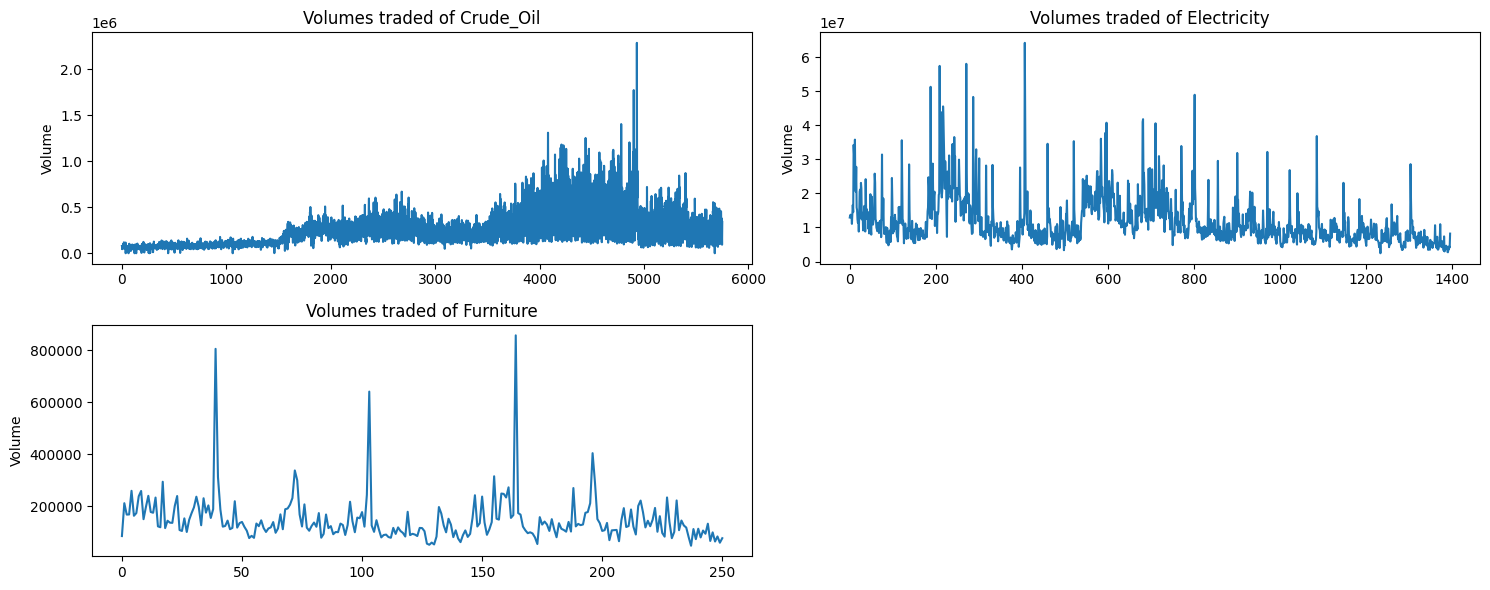

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, products in enumerate(products_list, 1):
  plt.subplot(2, 2, i)
  products['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Volumes traded of {tech_list[i - 1]}")

plt.tight_layout()

# **Predicting the percentage change in Volume**

Text(0.5, 1.0, 'Furniture')

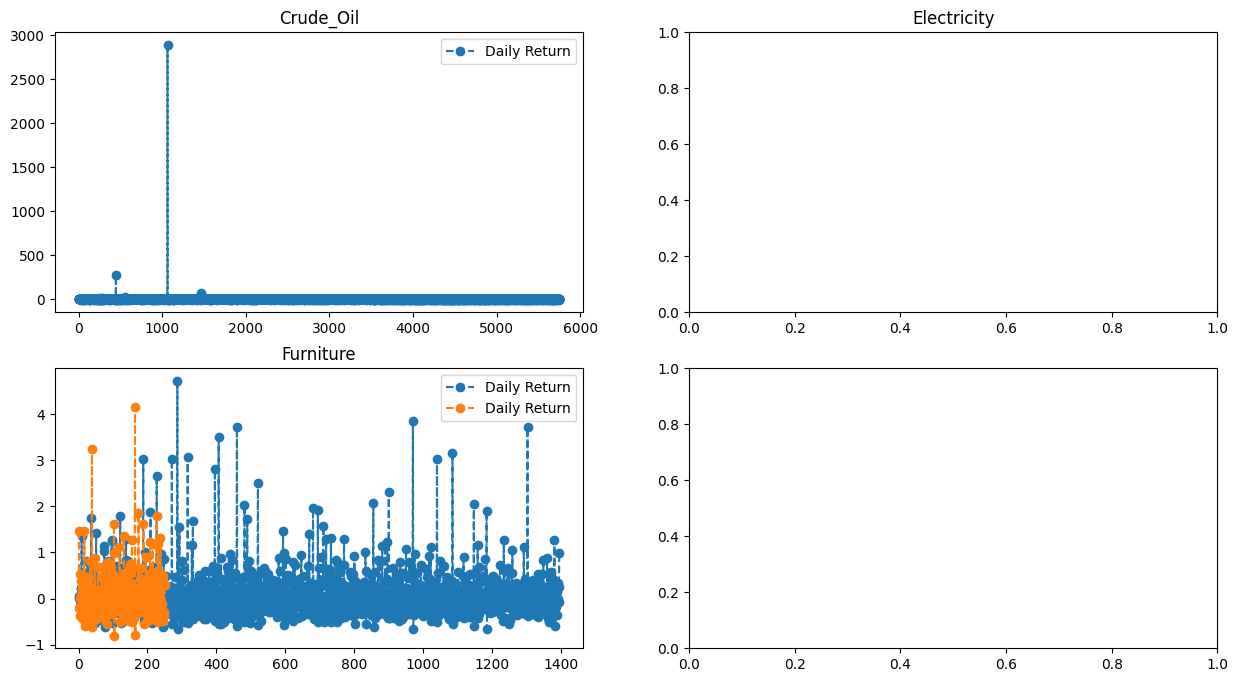

In [ ]:
for products in products_list:
  products['Daily Return'] = products['Volume'].pct_change()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

dsp['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Crude_Oil')
dep['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Electricity')
dfp['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Furniture')

# **For Crude Oil dataset**

In [ ]:
data_co= dsp.filter(["Volume"])

In [ ]:
dataset_co= data_co.values

In [ ]:
dataset_co.shape

(5755, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_scaler = MinMaxScaler()
scaled_dataset = data_scaler.fit_transform(dataset_co)

In [ ]:
training_data_co_len = int(np.ceil(len(dataset_co) * 0.70))
dataset_len = len(dataset_co)

In [ ]:
train_co_data = scaled_dataset[0 : int(training_data_co_len), :]

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60,len(train_co_data)):
  x_train.append(train_co_data[i-60:i,0])
  y_train.append(train_co_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(3966, 60, 1)

In [ ]:
y_train.shape

(3966,)

In [ ]:
val_co_data = scaled_dataset[training_data_co_len - 60 : -int(np.ceil(dataset_len * 0.15)), :]

In [ ]:
x_val = []
y_val = scaled_dataset[training_data_co_len : -int(np.ceil(dataset_len * 0.15)), :]
for i in range(60, len(val_co_data)):
  x_val.append(val_co_data[i - 60 : i, 0])

In [ ]:
x_val,y_val = np.array(x_val),np.array(y_val)

In [ ]:
x_val= np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [ ]:
x_val.shape

(862, 60, 1)

In [ ]:
y_val=y_val.flatten()

In [ ]:
y_val.shape

(862,)

In [ ]:
test_co_data = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) - 60 :, :]

In [ ]:
x_test = []
y_test = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) :, :]
for i in range(60, len(test_co_data)):
  x_test.append(test_co_data[i - 60 : i, 0])

In [ ]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape

(863, 60, 1)

In [ ]:
y_test.shape

(863, 1)

In [ ]:
y_test=y_test.flatten()

In [ ]:
y_test.shape

(863,)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_val shape: ", x_val.shape)
print("x_test shape: ", x_test.shape)
print("\ny_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3966, 60, 1)
x_val shape:  (862, 60, 1)
x_test shape:  (863, 60, 1)

y_train shape:  (3966,)
y_val shape:  (862,)
y_test shape:  (863,)


In [ ]:
from sklearn.metrics import (
mean_squared_error,
mean_absolute_error,
mean_absolute_percentage_error
)

In [ ]:
def get_results(model, X, y):
  results = {}
  predictions = model.predict(X)
  results["mse"] = mean_squared_error(predictions, y)
  results["mae"] = mean_absolute_error(predictions, y)
  results["mape"] = mean_absolute_percentage_error(predictions, y)
  return results

# **Using LSTM model**

In [ ]:
lstm_model=Sequential()
lstm_model.add(
    LSTM(
        128,
        return_sequences=True,
        input_shape=(
            x_train.shape[1],
            1,
        ),
    )
)
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

In [ ]:
lstm_model.compile(optimizer, loss="mean_squared_error")

In [ ]:
lstm_model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=100)

Epoch 1/100
3966/3966 [==============================] - 41s 10ms/step - loss: 7.4650e-04 - val_loss: 0.0070
Epoch 2/100
3966/3966 [==============================] - 41s 10ms/step - loss: 7.3082e-04 - val_loss: 0.0053
Epoch 3/100
3966/3966 [==============================] - 32s 8ms/step - loss: 7.3560e-04 - val_loss: 0.0044
Epoch 4/100
3966/3966 [==============================] - 45s 11ms/step - loss: 7.3440e-04 - val_loss: 0.0047
Epoch 5/100
3966/3966 [==============================] - 40s 10ms/step - loss: 7.2158e-04 - val_loss: 0.0067
Epoch 6/100
3966/3966 [==============================] - 35s 9ms/step - loss: 7.2673e-04 - val_loss: 0.0052
Epoch 7/100
3966/3966 [==============================] - 36s 9ms/step - loss: 7.2281e-04 - val_loss: 0.0075
Epoch 8/100
3966/3966 [==============================] - 30s 8ms/step - loss: 7.2888e-04 - val_loss: 0.0052
Epoch 9/100
3966/3966 [==============================] - 33s 8ms/step - loss: 7.1329e-04 - val_loss: 0.0054
Epoch 10/100
3966/3966 [

In [ ]:
lstm_train_results = get_results(lstm_model, x_train, y_train)
lstm_val_results = get_results(lstm_model, x_val, y_val)
lstm_test_results = get_results(lstm_model, x_test, y_test)

27/27 [==============================] - 0s 3ms/step


In [ ]:
print("Train results: ",lstm_train_results)
print("Test results: ",lstm_test_results)
print("Val results: ",lstm_val_results)

Train results:  {'mse': 0.0007173344182161517, 'mae': 0.01996905139161557, 'mape': 0.20903367545948942}
Test results:  {'mse': 0.003379770754558896, 'mae': 0.03793702023606329, 'mape': 0.22417805690160567}
Val results:  {'mse': 0.00452961237610252, 'mae': 0.0501220288090233, 'mape': 0.2149101148555969}


27/27 [==============================] - 0s 4ms/step


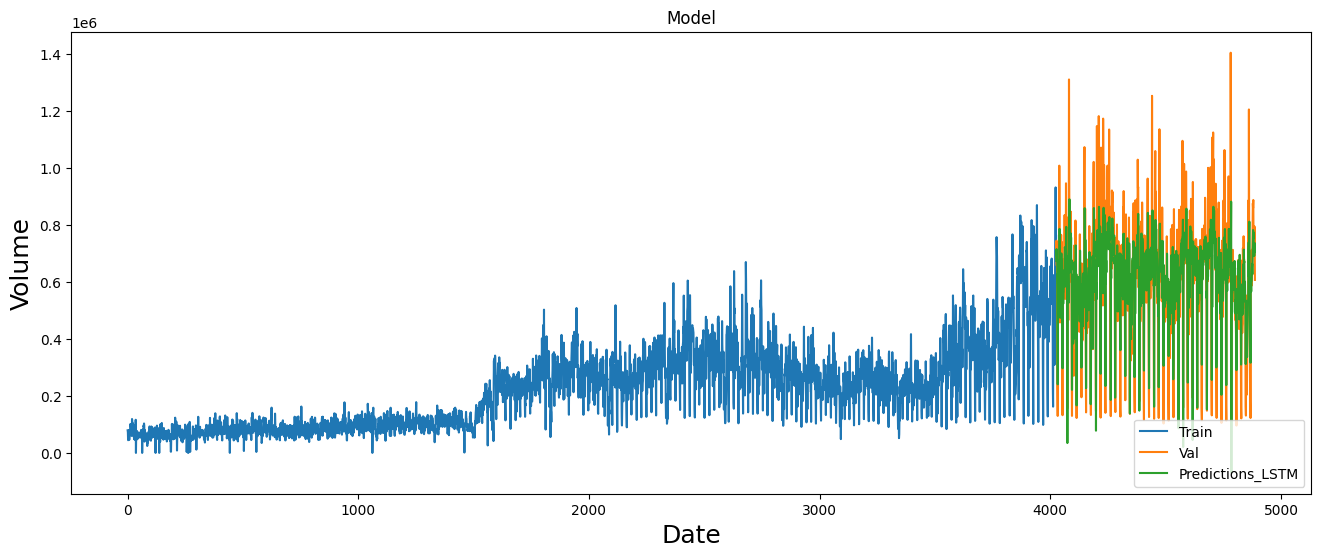

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
train = data_co[:training_data_co_len]
valid = data_co[training_data_co_len : -int(np.ceil(len(dataset_co) * 0.15))]
valid["Predictions_LSTM"] = data_scaler.inverse_transform(lstm_model.predict(x_val))
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Volume", fontsize=18)
plt.plot(train["Volume"])
plt.plot(valid[["Volume", "Predictions_LSTM"]])
plt.legend(["Train", "Val", "Predictions_LSTM"], loc="lower right")
plt.show()

# **Using Arima model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
train_predictions = []
x_train_arima = np.squeeze(x_train)
train_history = list(x_train_arima[0])
for t in tqdm(range(x_train.shape[0])):
  model = ARIMA(train_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  train_predictions.append(output[0])
  train_history.append(y_train[t])

arima_train_results = {'mse': mean_squared_error(train_predictions, y_train),
                       'mae': mean_absolute_error(train_predictions, y_train),
                       'mape': mean_absolute_percentage_error(train_predictions, y_train)}


NameError: ignored

In [ ]:
val_predictions = []
x_val_arima = np.squeeze(x_val)
val_history = train_history.copy()

In [ ]:
for t in tqdm(range(len(x_val))):
  model = ARIMA(val_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  val_predictions.append(output[0])
  val_history.append(y_val[t][0])

100%|██████████| 37/37 [00:06<00:00,  5.55it/s]


In [ ]:
arima_val_results = {'mse': mean_squared_error(val_predictions, y_val),
                     'mae': mean_absolute_error(val_predictions, y_val),
                     'mape': mean_absolute_percentage_error(val_predictions, y_val)}

In [ ]:
test_predictions = []
x_test_arima = np.squeeze(x_test)
test_history = val_history.copy()

In [ ]:
for t in tqdm(range(len(x_test))):
  model = ARIMA(test_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  test_predictions.append(output[0])
  test_history.append(y_test[t][0])

100%|██████████| 38/38 [00:09<00:00,  4.07it/s]


In [ ]:
arima_test_results = {'mse': mean_squared_error(test_predictions, y_test),
                      'mae': mean_absolute_error(test_predictions, y_test),
                      'mape': mean_absolute_percentage_error(test_predictions, y_test)}

In [ ]:
print("Train results: ", arima_train_results)
print("Val results: ", arima_val_results)
print("Test results: ", arima_test_results)

Train results:  {'mse': 0.016499291799618468, 'mae': 0.07211359446168257, 'mape': 0.581402985433635}
Val results:  {'mse': 0.006345436437513876, 'mae': 0.05477157781183885, 'mape': 0.4848812434814837}
Test results:  {'mse': 0.0030478210832928813, 'mae': 0.045412363304304405, 'mape': 0.5024957436001943}


# **Visualising the Data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data_co[:training_data_co_len]
valid = data_co[training_data_co_len : -int(np.ceil(len(dataset_co) * 0.15))]

In [ ]:
val_predictions=np.array(val_predictions)
scaler=MinMaxScaler()
scaler.fit(val_predictions)
valid["Predictions_ARIMA"] = scaler.inverse_transform(val_predictions)

# **Using Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_clf=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

In [ ]:
x_train=x_train.reshape(3966,60)
x_val=x_val.reshape(862,60)
x_test=x_test.reshape(863,60)

In [ ]:
lr_clf.fit(x_train,y_train)

LinearRegression()

In [ ]:
train_predictions = lr_clf.predict(x_train)
val_predictions = lr_clf.predict(x_val)
test_predictions=lr_clf.predict(x_test)

In [ ]:
train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

In [ ]:
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Testing MSE:", test_mse)

Training MSE: 0.0006165973797728418
Validation MSE: 0.005160233268122387
Testing MSE: 0.003499232927768298


In [ ]:
train_mape=mean_absolute_percentage_error(y_train,train_predictions)
val_mape=mean_absolute_percentage_error(y_val,val_predictions)
test_mape=mean_absolute_percentage_error(y_test,test_predictions)

In [ ]:
print("Training MAPE:", train_mape)
print("Validation MAPE:", val_mape)
print("Testing MAPE:", test_mape)

Training MAPE: 162045596813.387
Validation MAPE: 0.29733528442222845
Testing MAPE: 698125474572.9011


In [ ]:
train_mae=mean_absolute_error(y_train,train_predictions)
val_mae=mean_absolute_error(y_val,val_predictions)
test_mae=mean_absolute_error(y_test,test_predictions)

In [ ]:
print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

Training MAE: 0.016800688975066338
Validation MAE: 0.05441376737802271
Testing MAE: 0.03751036873494082


## **Using Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr= DecisionTreeRegressor(random_state=42,max_depth=None,criterion="absolute_error",splitter='random',min_samples_leaf=1)

In [ ]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=42,
                      splitter='random')

In [ ]:
train_predictions_dtr = dtr.predict(x_train)
val_predictions_dtr= dtr.predict(x_val)
test_predictions_dtr= dtr.predict(x_test)

In [ ]:
train_dtr_mse = mean_squared_error(y_train, train_predictions)
val_dtr_mse = mean_squared_error(y_val, val_predictions)
test_dtr_mse = mean_squared_error(y_test, test_predictions)

In [ ]:
print("Training MSE:", train_dtr_mse)
print("Validation MSE:", val_dtr_mse)
print("Testing MSE:", test_dtr_mse)

Training MSE: 0.0006165973797728418
Validation MSE: 0.005160233268122387
Testing MSE: 0.003499232927768298


In [ ]:
train_dtr_mape=mean_absolute_percentage_error(y_train,train_predictions_dtr)
val_dtr_mape=mean_absolute_percentage_error(y_val,val_predictions_dtr)
test_dtr_mape=mean_absolute_percentage_error(y_test,test_predictions_dtr)

In [ ]:
print("Training MAPE:", train_dtr_mape)
print("Validation MAPE:", val_dtr_mape)
print("Testing MAPE:", test_dtr_mape)

Training MAPE: 0.0
Validation MAPE: 0.3591891134768319
Testing MAPE: 560833986190.0951


In [ ]:
train_dtr_mae=mean_absolute_error(y_train,train_predictions)
val_dtr_mae=mean_absolute_error(y_val,val_predictions)
test_dtr_mae=mean_absolute_error(y_test,test_predictions)

In [ ]:
print("Training MAE:", train_dtr_mae)
print("Validation MAE", val_dtr_mae)
print("Testing MAE", test_dtr_mae)

Training MAE: 0.016800688975066338
Validation MAE 0.05441376737802271
Testing MAE 0.03751036873494082


# **Using GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(loss='absolute_error',n_estimators=1000,learning_rate=0.001,max_depth=100,criterion='friedman_mse')

In [ ]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.001, loss='absolute_error',
                          max_depth=100, n_estimators=1000)

In [ ]:
train_predictions_gbr = gbr.predict(x_train)
val_predictions_gbr= gbr.predict(x_val)
test_predictions_gbr= gbr.predict(x_test)

In [ ]:
train_gbr_mse = mean_squared_error(y_train, train_predictions_gbr)
val_gbr_mse = mean_squared_error(y_val, val_predictions_gbr)
test_gbr_mse = mean_squared_error(y_test, test_predictions_gbr)

In [ ]:
print("Training MSE:", train_gbr_mse)
print("Validation MSE:", val_gbr_mse)
print("Testing MSE:", test_gbr_mse)

Training MSE: 0.0010053904516884944
Validation MSE: 0.02008134221540867
Testing MSE: 0.006357854036463869


In [ ]:
train_dtr_mape=mean_absolute_percentage_error(y_train,train_predictions_gbr)
val_dtr_mape=mean_absolute_percentage_error(y_val,val_predictions_gbr)
test_gbr_mape = mean_absolute_percentage_error(y_test, test_predictions_gbr)

In [ ]:
print("Training MAPE:", train_gbr_mse)
print("Validation MAPE:", val_gbr_mse)
print("Testing MAPE:", test_gbr_mse)

Training MAPE: 0.0010053904516884944
Validation MAPE: 0.02008134221540867
Testing MAPE: 0.006357854036463869


In [ ]:
train_gbr_mae=mean_absolute_error(y_train,train_predictions)
val_gbr_mae=mean_absolute_error(y_val,val_predictions)
test_gbr_mae=mean_absolute_error(y_test,test_predictions)

In [ ]:
print("Training MAE:", train_gbr_mae)
print("Validation MAE", val_gbr_mae)
print("Testing MAE", test_gbr_mae)

Training MAE: 0.016800688975066338
Validation MAE 0.05441376737802271
Testing MAE 0.03751036873494082


# **Using Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200,max_depth=None,min_samples_split=2,max_features='sqrt',max_samples=None)

In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [ ]:
train_predictions_rfr = rfr.predict(x_train)
val_predictions_rfr= rfr.predict(x_val)
test_predictions_rfr= rfr.predict(x_test)

In [ ]:
train_rfr_mse = mean_squared_error(y_train, train_predictions_rfr)
val_rfr_mse= mean_squared_error(y_val, val_predictions_rfr)
test_rfr_mse= mean_squared_error(y_test, test_predictions_rfr)

In [ ]:
print("Training MSE:", train_rfr_mse)
print("Validation MSE:", val_rfr_mse)
print("Testing MSE", test_rfr_mse)

Training MSE: 8.917215107866917e-05
Validation MSE: 0.006577562153323323
Testing MSE 0.0038908168076194297


In [ ]:
train_rfr_mape=mean_absolute_percentage_error(y_train,train_predictions_rfr)
val_rfr_mape=mean_absolute_percentage_error(y_val,val_predictions_rfr)
test_rfr_mape=mean_absolute_percentage_error(y_test,test_predictions_rfr)

In [ ]:
print("Training MAPE:", train_rfr_mape)
print("Validation MAPE:", val_rfr_mape)
print("Testing MAPE", test_rfr_mape)

Training MAPE: 62542843336.045586
Validation MAPE: 0.33071045224429524
Testing MAPE 830808460961.4791


In [ ]:
train_rfr_mae=mean_absolute_error(y_train,train_predictions)
val_rfr_mae=mean_absolute_error(y_val,val_predictions)
test_rfr_mae=mean_absolute_error(y_test,test_predictions)

In [ ]:
print("Training MAE:", train_rfr_mae)
print("Validation MAE:", val_rfr_mae)
print("Testing MAE:", test_rfr_mae)

Training MAE: 0.016800688975066338
Validation MAE: 0.05441376737802271
Testing MAE: 0.03751036873494082


# **Using Support Vector Regression**

In [ ]:
from sklearn.svm import LinearSVR
svm=LinearSVR(
         random_state=42,
         loss="squared_epsilon_insensitive",
         dual=False,
)

In [ ]:
x_train=x_train.reshape(3966,60)
x_val=x_val.reshape(862,60)
x_test=x_test.reshape(863,60)

In [ ]:
svm.fit(x_train,y_train)

LinearSVR(dual=False, loss='squared_epsilon_insensitive', random_state=42)

In [ ]:
train_predictions_svm = svm.predict(x_train)
val_predictions_svm= svm.predict(x_val)
test_predictions_svm= svm.predict(x_test)

In [ ]:
train_svm_mse = mean_squared_error(y_train, train_predictions_svm)
val_svm_mse= mean_squared_error(y_val, val_predictions_svm)
test_svm_mse= mean_squared_error(y_test, test_predictions_svm)

In [ ]:
print("Training MSE:", train_svm_mse)
print("Validation MSE:", val_svm_mse)
print("Testing MSE:", test_svm_mse)

Training MSE: 0.0006206505526721982
Validation MSE: 0.005169236900953801
Testing MSE: 0.0034980981125297722


In [ ]:
train_svm_mape=mean_absolute_percentage_error(y_train,train_predictions_svm)
val_svm_mape=mean_absolute_percentage_error(y_val,val_predictions_svm)
test_svm_mape=mean_absolute_percentage_error(y_test,test_predictions_svm)

In [ ]:
print("Training MAPE:", train_svm_mape)
print("Validation MAPE:", val_svm_mape)
print("Testing MAPE:", test_svm_mape)

Training MAPE: 164592524705.23972
Validation MAPE: 0.30510919695587324
Testing MAPE: 717077231007.8597


In [ ]:
train_svm_mae=mean_absolute_error(y_train,train_predictions_svm)
val_svm_mae=mean_absolute_error(y_val,val_predictions_svm)
test_svm_mae=mean_absolute_error(y_test,test_predictions_svm)

In [ ]:
print("Training RMSE:", train_svm_mae)
print("Validation RMSE:", val_svm_mae)
print("Testing RMSE:", test_svm_mae)

Training RMSE: 0.016802988273035616
Validation RMSE: 0.054267687050417936
Testing RMSE: 0.03747961837276704


# **Using Prophet model**

In [ ]:
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [ ]:
dsp

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385,NaN
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978,-0.080708
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601,-0.388843
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770,0.048631
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131,0.050481
...,...,...,...,...,...,...,...,...
5746,2023-07-17,75.019997,76.089996,73.839996,74.150002,74.150002,244785,-0.182895
5747,2023-07-18,74.180000,75.959999,73.879997,75.750000,75.750000,125092,-0.488972
5748,2023-07-19,75.839996,76.970001,75.070000,75.349998,75.349998,92920,-0.257187
5749,2023-07-20,75.349998,76.150002,74.720001,75.629997,75.629997,340962,2.669415


In [ ]:
dsp2=dsp[['Date','Volume']]

In [ ]:
dsp2.columns=['ds','y']

In [ ]:
dsp2

,ds,y
0,2000-08-23,79385
1,2000-08-24,72978
2,2000-08-25,44601
3,2000-08-28,46770
4,2000-08-29,49131
...,...,...
5746,2023-07-17,244785
5747,2023-07-18,125092
5748,2023-07-19,92920
5749,2023-07-20,340962


In [ ]:
pro_model = Prophet(interval_width=0.95)

In [ ]:
pro_model.fit(dsp2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvisdjp09/hpfuc6xp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvisdjp09/0jaemek3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78572', 'data', 'file=/tmp/tmpvisdjp09/hpfuc6xp.json', 'init=/tmp/tmpvisdjp09/0jaemek3.json', 'output', 'file=/tmp/tmpvisdjp09/prophet_model9ilh8yq1/prophet_model-20230722194750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:47:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:47:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_date = pro_model.make_future_dataframe(periods=40, freq='MS')
future_date.tail()

,ds
5786,2026-07-01
5787,2026-08-01
5788,2026-09-01
5789,2026-10-01
5790,2026-11-01


In [ ]:
forecast = pro_model.predict(future_date)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2000-08-23,67647.075952,-160821.342809,307262.210526
1,2000-08-24,49100.802763,-166420.368784,274620.433186
2,2000-08-25,27196.226100,-218460.862487,260009.794889
3,2000-08-28,20693.701633,-215155.505397,261507.574025
4,2000-08-29,52915.325306,-197698.355917,264919.061464


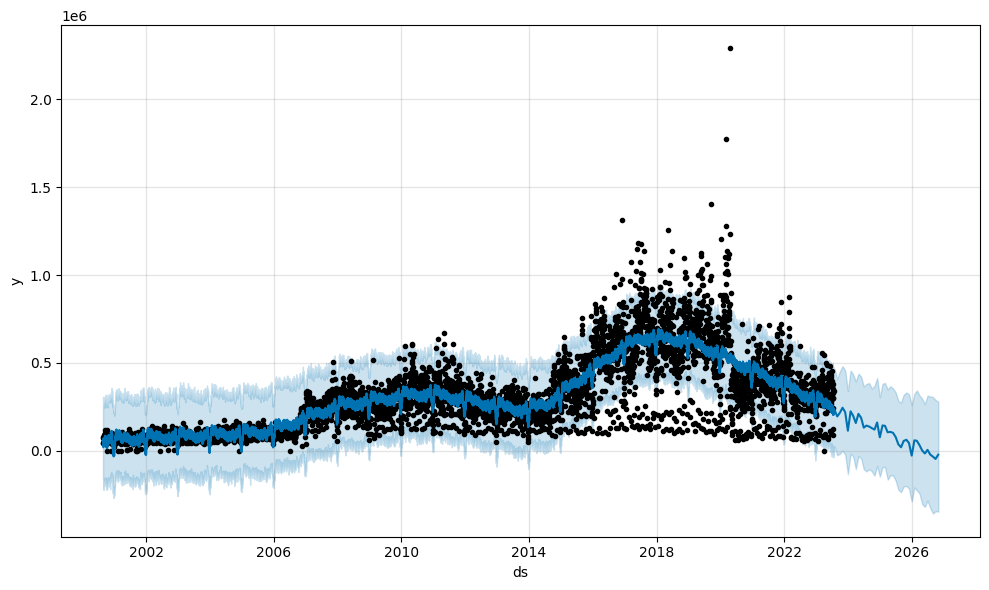

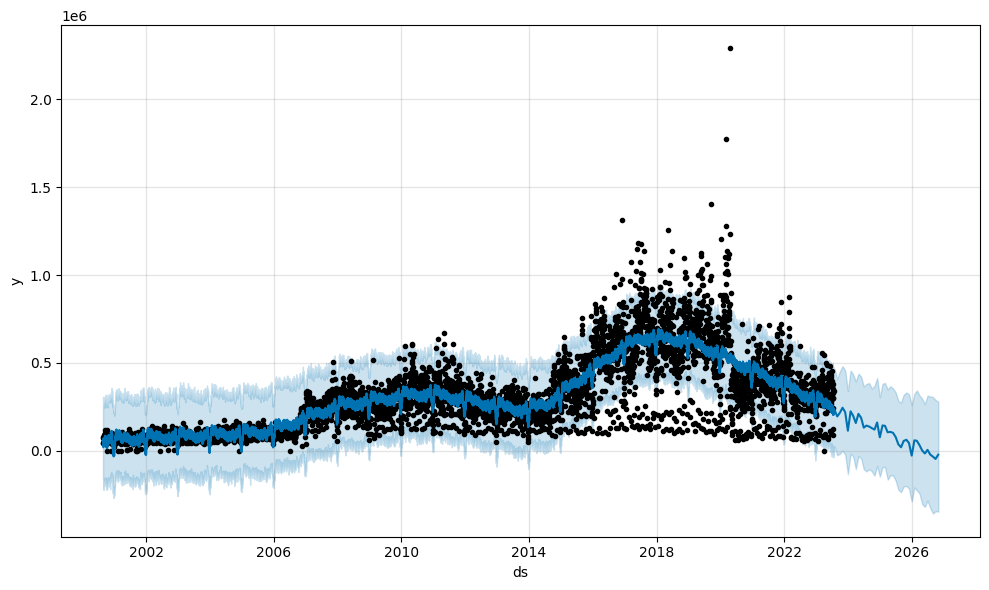

In [ ]:
pro_model.plot(forecast, uncertainty=True)

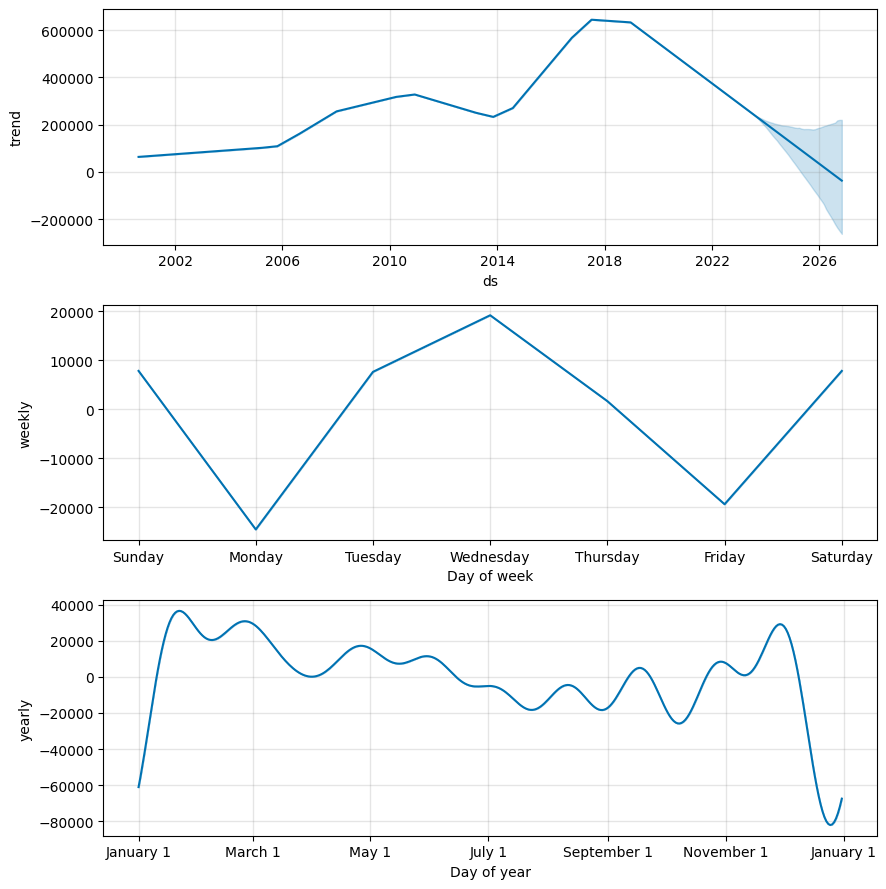

In [ ]:
fig1=pro_model.plot_components(forecast)

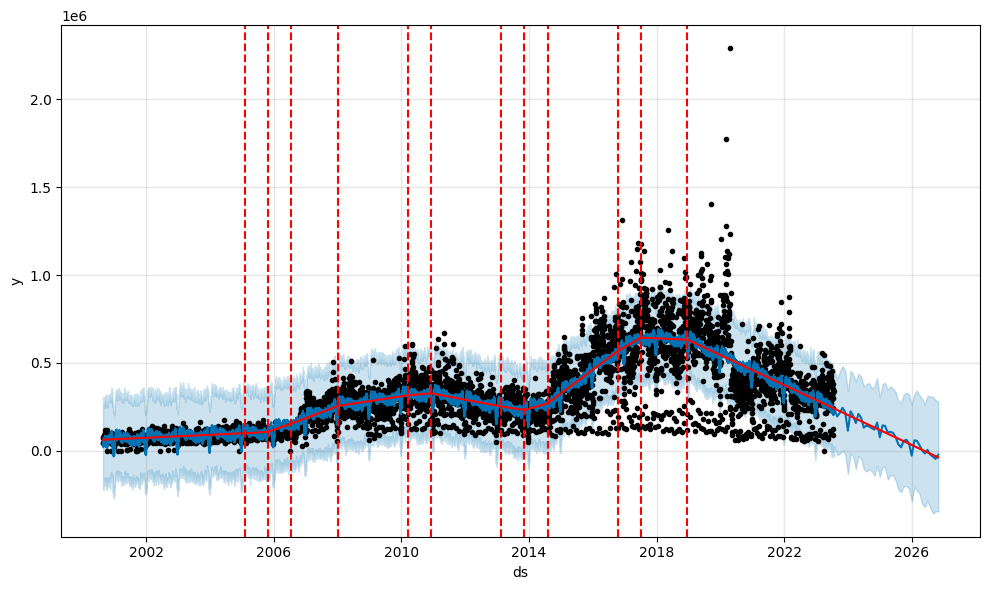

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig =pro_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),pro_model,forecast)

In [ ]:
pro_model.changepoints

184    2001-05-18
368    2002-02-19
552    2002-11-11
736    2003-08-07
920    2004-05-05
1104   2005-01-31
1288   2005-10-21
1472   2006-07-20
1656   2007-04-13
1840   2008-01-04
2024   2008-09-26
2208   2009-06-22
2391   2010-03-15
2575   2010-12-03
2759   2011-08-26
2943   2012-05-21
3127   2013-02-14
3311   2013-11-06
3495   2014-08-01
3679   2015-04-27
3863   2016-01-19
4047   2016-10-11
4231   2017-07-07
4415   2018-04-02
4599   2018-12-21
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvisdjp09/q0tzdhfs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvisdjp09/hmslx0ng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35715', 'data', 'file=/tmp/tmpvisdjp09/q0tzdhfs.json', 'init=/tmp/tmpvisdjp09/hmslx0ng.json', 'output', 'file=/tmp/tmpvisdjp09/prophet_modelsf0qtr9w/prophet_model-20230722195129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:51:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:51:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


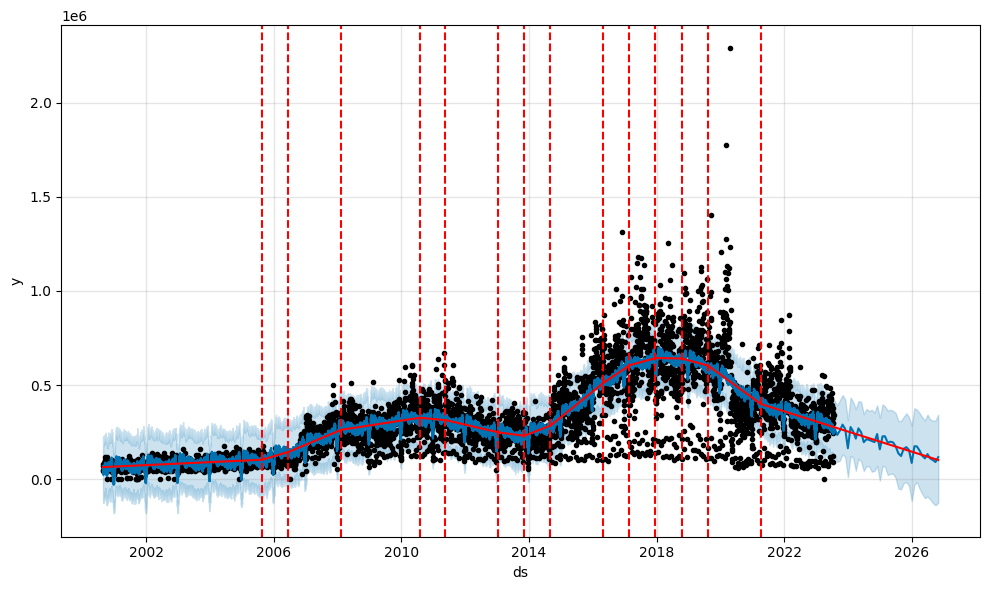

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(dsp2).predict(future_date)
fig= pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

# **For Electricity sales dataset**

In [ ]:
data_elec=dep.filter(["Volume"])

In [ ]:
dataset_elec = data_elec.values

In [ ]:
dataset_elec.shape

(1397, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_scaler = MinMaxScaler()
scaled_dataset = data_scaler.fit_transform(dataset_elec)

In [ ]:
training_data_elec_len = int(np.ceil(len(dataset_elec) * 0.70))
dataset_len = len(dataset_elec)

In [ ]:
train_data = scaled_dataset[0 : int(training_data_elec_len), :]

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
val_data = scaled_dataset[training_data_elec_len - 60 : -int(np.ceil(dataset_len * 0.15)), :]

In [ ]:
x_val = []
y_val = scaled_dataset[training_data_elec_len : -int(np.ceil(dataset_len * 0.15)), :]
for i in range(60, len(val_data)):
  x_val.append(val_data[i - 60 : i, 0])

In [ ]:
x_val = np.array(x_val)

In [ ]:
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [ ]:
test_data = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) - 60 :, :]

In [ ]:
x_test = []
y_test = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60 : i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_val shape: ", x_val.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (918, 60, 1)
x_val shape:  (209, 60, 1)
x_test shape:  (210, 60, 1)
y_train shape:  (918,)
y_val shape:  (209, 1)
y_test shape:  (210, 1)


In [ ]:
from sklearn.metrics import (
mean_squared_error,
mean_absolute_error,
mean_absolute_percentage_error
)

In [ ]:
def get_results(model, X, y):
  results = {}
  predictions = model.predict(X)
  results["mse"] = mean_squared_error(predictions, y)
  results["mae"] = mean_absolute_error(predictions, y)
  results["mape"] = mean_absolute_percentage_error(predictions, y)
  return results

# **Using LSTM model for Prediction**

In [ ]:
lstm_model=Sequential()
lstm_model.add(
    LSTM(
        128,
        return_sequences=True,
        input_shape=(
            x_train.shape[1],
            1,
        ),
    )
)
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [ ]:
lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

In [ ]:
lstm_model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=16, epochs=100)

Epoch 1/100
58/58 [==============================] - 10s 91ms/step - loss: 0.0171 - val_loss: 0.0041
Epoch 2/100
58/58 [==============================] - 6s 100ms/step - loss: 0.0117 - val_loss: 0.0042
Epoch 3/100
58/58 [==============================] - 9s 150ms/step - loss: 0.0115 - val_loss: 0.0049
Epoch 4/100
58/58 [==============================] - 7s 118ms/step - loss: 0.0113 - val_loss: 0.0042
Epoch 5/100
58/58 [==============================] - 7s 122ms/step - loss: 0.0113 - val_loss: 0.0037
Epoch 6/100
58/58 [==============================] - 8s 133ms/step - loss: 0.0112 - val_loss: 0.0046
Epoch 7/100
58/58 [==============================] - 8s 135ms/step - loss: 0.0111 - val_loss: 0.0041
Epoch 8/100
58/58 [==============================] - 7s 124ms/step - loss: 0.0110 - val_loss: 0.0038
Epoch 9/100
58/58 [==============================] - 8s 131ms/step - loss: 0.0109 - val_loss: 0.0041
Epoch 10/100
58/58 [==============================] - 6s 105ms/step - loss: 0.0110 - val_lo

In [ ]:
lstm_train_results = get_results(lstm_model, x_train, y_train)
lstm_val_results = get_results(lstm_model, x_val, y_val)
lstm_test_results = get_results(lstm_model, x_test, y_test)

7/7 [==============================] - 0s 33ms/step


In [ ]:
print("Train results: ",lstm_train_results)
print("Test results: ",lstm_test_results)
print("Val results: ",lstm_val_results)

Train results:  {'mse': 0.009109975651444085, 'mae': 0.055901685219558114, 'mape': 0.35313588300022775}
Test results:  {'mse': 0.0017123795690055941, 'mae': 0.02964345053735217, 'mape': 0.36880169370449895}
Val results:  {'mse': 0.0032466527885988113, 'mae': 0.0358381765167893, 'mape': 0.3524820444289863}


7/7 [==============================] - 0s 54ms/step


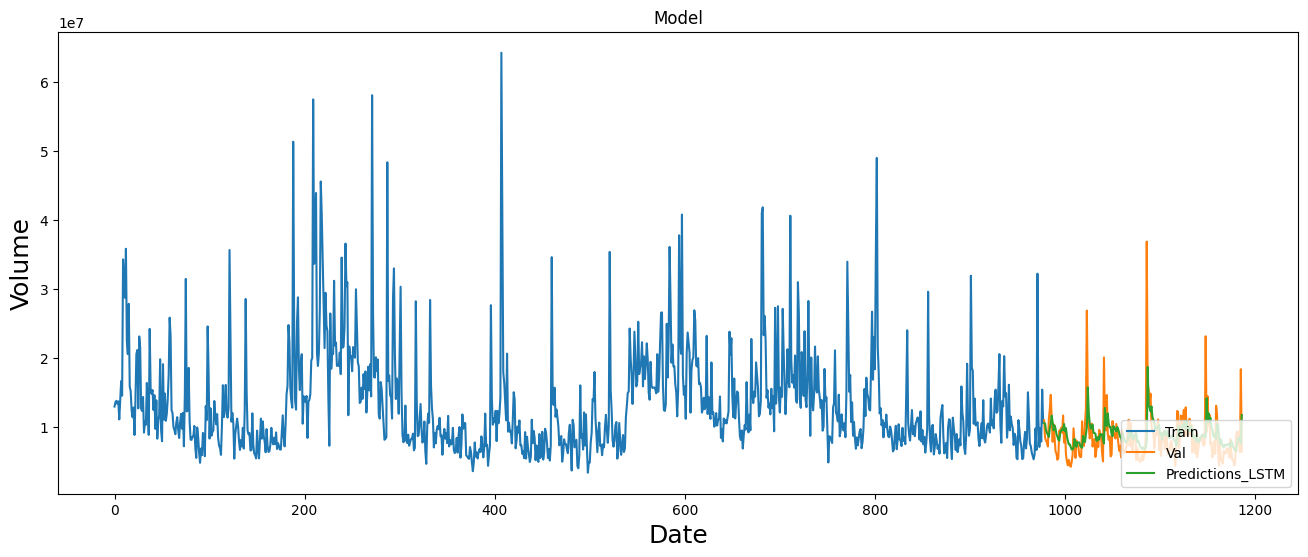

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
train = data_elec[:training_data_elec_len]
valid = data_elec[training_data_elec_len : -int(np.ceil(len(dataset_elec) * 0.15))]
valid["Predictions_LSTM"] = data_scaler.inverse_transform(lstm_model.predict(x_val))
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Volume", fontsize=18)
plt.plot(train["Volume"])
plt.plot(valid[["Volume", "Predictions_LSTM"]])
plt.legend(["Train", "Val", "Predictions_LSTM"], loc="lower right")
plt.show()

# **Using the ARIMA Time-series model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
train_predictions = []
x_train_arima = np.squeeze(x_train)
train_history = list(x_train_arima[0])
for t in tqdm(range(x_train.shape[0])):
  model = ARIMA(train_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  train_predictions.append(output[0])
  train_history.append(y_train[t])

arima_train_results = {'mse': mean_squared_error(train_predictions, y_train),
                       'mae': mean_absolute_error(train_predictions, y_train),
                       'mape': mean_absolute_percentage_error(train_predictions, y_train)}

100%|██████████| 918/918 [07:08<00:00,  2.14it/s]


In [ ]:
val_predictions = []
x_val_arima = np.squeeze(x_val)
val_history = train_history.copy()

In [ ]:
for t in tqdm(range(len(x_val))):
  model = ARIMA(val_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  val_predictions.append(output[0])
  val_history.append(y_val[t][0])

100%|██████████| 209/209 [02:53<00:00,  1.21it/s]


In [ ]:
arima_val_results = {'mse': mean_squared_error(val_predictions, y_val),
                     'mae': mean_absolute_error(val_predictions, y_val),
                     'mape': mean_absolute_percentage_error(val_predictions, y_val)}

In [ ]:
test_predictions = []
x_test_arima = np.squeeze(x_test)
test_history = val_history.copy()

In [ ]:
for t in tqdm(range(len(x_test))):
  model = ARIMA(test_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  test_predictions.append(output[0])
  test_history.append(y_test[t][0])

100%|██████████| 210/210 [00:59<00:00,  3.51it/s]


In [ ]:
arima_test_results = {'mse': mean_squared_error(test_predictions, y_test),
                      'mae': mean_absolute_error(test_predictions, y_test),
                      'mape': mean_absolute_percentage_error(test_predictions, y_test)}

In [ ]:
print("Train results: ", arima_train_results)
print("Val results: ", arima_val_results)
print("Test results: ", arima_test_results)

Train results:  {'mse': 0.010173223573857571, 'mae': 0.06058326466894411, 'mape': 0.37631015376604354}
Val results:  {'mse': 0.003532291420192063, 'mae': 0.03591791433511219, 'mape': 0.38280476150674786}
Test results:  {'mse': 0.0016232289204405924, 'mae': 0.025344069435360043, 'mape': 0.4046249591115933}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]

In [ ]:
val_predictions=np.array(val_predictions)
val_predictions2=val_predictions.T
scaler=MinMaxScaler()
scaler.fit(val_predictions2)
valid["Predictions_ARIMA"] = scaler.inverse_transform(val_predictions2)

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions_ARIMA"]])
plt.legend(["Train", "Val", "Predictions_ARIMA"], loc="lower right")
plt.show()

# **Using Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_clf=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

In [ ]:
x_train=x_train.reshape(918,60)
x_val=x_val.reshape(209,60)
x_test=x_test.reshape(210,60)

In [ ]:
lr_clf.fit(x_train,y_train)

LinearRegression()

In [ ]:
train_predictions = lr_clf.predict(x_train)
val_predictions = lr_clf.predict(x_val)
test_predictions=lr_clf.predict(x_test)

In [ ]:
train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

In [ ]:
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Testing MSE:", test_mse)

Training MSE: 0.008679680560561495
Validation MSE: 0.0037028477303526863
Testing MSE: 0.0018913139488321248


In [ ]:
train_mape=mean_absolute_percentage_error(y_train,train_predictions)
val_mape=mean_absolute_percentage_error(y_val,val_predictions)
test_mape=mean_absolute_percentage_error(y_test,test_predictions)

In [ ]:
print("Training MAPE:", train_mape)
print("Validation MAPE:", val_mape)
print("Testing MAPE:", test_mape)

Training MAPE: 0.3966542983873263
Validation MAPE: 0.5050702140716917
Testing MAPE: 1588586681927.9866


In [ ]:
train_mae=mean_absolute_error(y_train,train_predictions)
val_mae=mean_absolute_error(y_val,val_predictions)
test_mae=mean_absolute_error(y_test,test_predictions)

In [ ]:
print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Testing MAE:", test_mae)

Training MAE: 0.05769108353951426
Validation MAE: 0.04088223329216116
Testing MAE: 0.031612845827195354


# **Using Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr= DecisionTreeRegressor(random_state=42,max_depth=None,criterion="absolute_error",splitter='random',min_samples_leaf=1)

In [ ]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=42,
                      splitter='random')

In [ ]:
train_predictions = dtr.predict(x_train)
val_predictions = dtr.predict(x_val)
test_predictions=dtr.predict(x_test)

In [ ]:
train_mse_dtr = mean_squared_error(y_train, train_predictions)
val_mse_dtr = mean_squared_error(y_val, val_predictions)
test_mse_dtr = mean_squared_error(y_test, test_predictions)

In [ ]:
print("Training MSE:", train_mse_dtr)
print("Validation MSE:", val_mse_dtr)
print("Testing MSE:", test_mse_dtr)

Training MSE: 0.0
Validation MSE: 0.00576712544472589
Testing MSE: 0.006994130778321508


In [ ]:
train_mape_dtr=mean_absolute_percentage_error(y_train,train_predictions)
val_mape_dtr=mean_absolute_percentage_error(y_val,val_predictions)
test_mape_dtr=mean_absolute_percentage_error(y_test,test_predictions)

In [ ]:
print("Training MAPE:", train_mape_dtr)
print("Validation MAPE:", val_mape_dtr)
print("Testing MAPE:", test_mape_dtr)

Training MAPE: 0.0
Validation MAPE: 0.558653265565395
Testing MAPE: 1150022678430.9873


In [ ]:
train_mae_dtr=mean_absolute_error(y_train,train_predictions)
val_mae_dtr=mean_absolute_error(y_val,val_predictions)
test_mae_dtr=mean_absolute_error(y_test,test_predictions)

In [ ]:
print("Training MAE:", train_mae_dtr)
print("Validation MAE:", val_mae_dtr)
print("Testing MAE:", test_mae_dtr)

Training MAE: 0.0
Validation MAE: 0.05063812323850242
Testing MAE: 0.043331575419326994


# **Using Support Vector Machine Regressor**

In [ ]:
from sklearn.svm import LinearSVR
svm=LinearSVR(
         random_state=42,
         loss="squared_epsilon_insensitive",
         dual=False,
)

In [ ]:
svm.fit(x_train,y_train)

LinearSVR(dual=False, loss='squared_epsilon_insensitive', random_state=42)

In [ ]:
train_predictions_svm = svm.predict(x_train)
val_predictions_svm= svm.predict(x_val)
test_predictions_svm= svm.predict(x_test)

In [ ]:
train_mse_svm = mean_squared_error(y_train, train_predictions)
val_mse_svm = mean_squared_error(y_val, val_predictions)
test_mse_svm = mean_squared_error(y_test, test_predictions)

In [ ]:
print("Training MSE:", train_mse_svm)
print("Validation MSE:", val_mse_svm)
print("Testing MSE:", test_mse_svm)

Training MSE: 0.0
Validation MSE: 0.00576712544472589
Testing MSE: 0.006994130778321508


In [ ]:
train_mape_svm=mean_absolute_percentage_error(y_train,train_predictions)
val_mape_svm=mean_absolute_percentage_error(y_val,val_predictions)
test_mape_svm=mean_absolute_percentage_error(y_test,test_predictions)

In [ ]:
print("Training MAPE:", train_mape_svm)
print("Validation MAPE:", val_mape_svm)
print("Testing MAPE:", test_mape_svm)

Training MAPE: 0.0
Validation MAPE: 0.558653265565395
Testing MAPE: 1150022678430.9873


In [ ]:
train_mae_svm=mean_absolute_error(y_train,train_predictions)
val_mae_svm=mean_absolute_error(y_val,val_predictions)
test_mae_svm=mean_absolute_error(y_test,test_predictions)

In [ ]:
print("Training MAE:", train_mae_svm)
print("Validation MAE:", val_mae_svm)
print("Testing MAE:", test_mae_svm)

Training MAE: 0.0
Validation MAE: 0.05063812323850242
Testing MAE: 0.043331575419326994


# **For Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(loss='absolute_error',n_estimators=1000,learning_rate=0.001,max_depth=100,criterion='friedman_mse')

In [ ]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.001, loss='absolute_error',
                          max_depth=100, n_estimators=1000)

In [ ]:
train_predictions_gbr = gbr.predict(x_train)
val_predictions_gbr= gbr.predict(x_val)
test_predictions_gbr= gbr.predict(x_test)

In [ ]:
train_mse_gbr = mean_squared_error(y_train, train_predictions)
val_mse_gbr = mean_squared_error(y_val, val_predictions)
test_mse_gbr = mean_squared_error(y_test, test_predictions)

In [ ]:
print("Training MSE:", train_mse_gbr)
print("Validation MSE:", val_mse_gbr)
print("Testing MSE:", test_mse_gbr)

Training MSE: 0.0
Validation MSE: 0.00576712544472589
Testing MSE: 0.006994130778321508


In [ ]:
train_mape_gbr=mean_absolute_percentage_error(y_train,train_predictions)
val_mape_gbr=mean_absolute_percentage_error(y_val,val_predictions)
test_mape_gbr=mean_absolute_percentage_error(y_test,test_predictions)

In [ ]:
print("Training MAPE:", train_mape_gbr)
print("Validation MAPE:", val_mape_gbr)
print("Testing MAPE:", test_mape_gbr)

Training MAPE: 0.0
Validation MAPE: 0.558653265565395
Testing MAPE: 1150022678430.9873


In [ ]:
train_mae_gbr=mean_absolute_error(y_train,train_predictions)
val_mae_gbr=mean_absolute_error(y_val,val_predictions)
test_mae_gbr=mean_absolute_error(y_test,test_predictions)

In [ ]:
print("Training MAE:", train_mae_gbr)
print("Validation MAE:", val_mae_gbr)
print("Testing MAE:", test_mae_gbr)

Training MAE: 0.0
Validation MAE: 0.05063812323850242
Testing MAE: 0.043331575419326994


# **Using Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200,max_depth=None,min_samples_split=2,max_features='sqrt',max_samples=None)

In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [ ]:
train_predictions_rfr = rfr.predict(x_train)
val_predictions_rfr= rfr.predict(x_val)
test_predictions_rfr= rfr.predict(x_test)

In [ ]:
train_mse_rfr = mean_squared_error(y_train, train_predictions)
val_mse_rfr = mean_squared_error(y_val, val_predictions)
test_mse_rfr = mean_squared_error(y_test, test_predictions)

In [ ]:
print("Training MSE:", train_mse_rfr)
print("Validation MSE:", val_mse_rfr)
print("Testing MSE:", test_mse_rfr)

Training MSE: 0.0
Validation MSE: 0.00576712544472589
Testing MSE: 0.006994130778321508


In [ ]:
train_mape_rfr=mean_absolute_percentage_error(y_train,train_predictions)
val_mape_rfr=mean_absolute_percentage_error(y_val,val_predictions)
test_mape_rfr=mean_absolute_percentage_error(y_test,test_predictions)

In [ ]:
print("Training MAPE:", train_mape_rfr)
print("Validation MAPE:", val_mape_rfr)
print("Testing MAPE:", test_mape_rfr)

Training MAPE: 0.0
Validation MAPE: 0.558653265565395
Testing MAPE: 1150022678430.9873


In [ ]:
train_mae_rfr=mean_absolute_error(y_train,train_predictions)
val_mae_rfr=mean_absolute_error(y_val,val_predictions)
test_mae_rfr=mean_absolute_error(y_test,test_predictions)

In [ ]:
print("Training MAE:", train_mae_rfr)
print("Validation MAE:", val_mae_rfr)
print("Testing MAE:", test_mae_rfr)

Training MAE: 0.0
Validation MAE: 0.05063812323850242
Testing MAE: 0.043331575419326994


# **Using Prophet model**

In [ ]:
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [ ]:
dep

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,105.566566,108.028580,105.266319,107.968536,103.101929,12917782
1,2018-01-03,109.890106,110.130310,108.268784,108.989372,104.076775,13567582
2,2018-01-04,110.370506,111.811684,109.890106,111.271240,106.255791,13747801
3,2018-01-05,113.252869,113.312920,111.091095,111.331291,106.313118,13302366
4,2018-01-08,112.111931,112.292084,108.689125,109.770012,104.822212,13671713
...,...,...,...,...,...,...,...
1392,2023-07-17,110.419998,112.150002,110.150002,111.139999,111.139999,3637200
1393,2023-07-18,110.900002,111.830002,110.519997,111.059998,111.059998,3573900
1394,2023-07-19,110.330002,110.809998,108.830002,109.889999,109.889999,4473200
1395,2023-07-20,110.040001,111.839996,109.959999,111.239998,111.239998,4117200


In [ ]:
dep2=dep[['Date','Volume']]

In [ ]:
dep2.columns=['ds','y']

In [ ]:
dep2

,ds,y
0,2018-01-02,12917782
1,2018-01-03,13567582
2,2018-01-04,13747801
3,2018-01-05,13302366
4,2018-01-08,13671713
...,...,...
1392,2023-07-17,3637200
1393,2023-07-18,3573900
1394,2023-07-19,4473200
1395,2023-07-20,4117200


In [ ]:
pro_model = Prophet(interval_width=0.95)

In [ ]:
pro_model.fit(dep2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplk20v_fv/b69_m0r3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplk20v_fv/kzq9fsl7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16256', 'data', 'file=/tmp/tmplk20v_fv/b69_m0r3.json', 'init=/tmp/tmplk20v_fv/kzq9fsl7.json', 'output', 'file=/tmp/tmplk20v_fv/prophet_model1ywogbo_/prophet_model-20230722215751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:57:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:57:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_date = pro_model.make_future_dataframe(periods=40, freq='MS')
future_date.tail()

,ds
1432,2026-07-01
1433,2026-08-01
1434,2026-09-01
1435,2026-10-01
1436,2026-11-01


In [ ]:
forecast = pro_model.predict(future_date)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-02,1.354227e+07,1.416204e+06,2.497793e+07
1,2018-01-03,1.345693e+07,2.055697e+06,2.501269e+07
2,2018-01-04,1.333528e+07,1.216092e+06,2.470039e+07
3,2018-01-05,1.338665e+07,8.171396e+05,2.563249e+07
4,2018-01-08,1.374684e+07,2.110934e+06,2.594633e+07


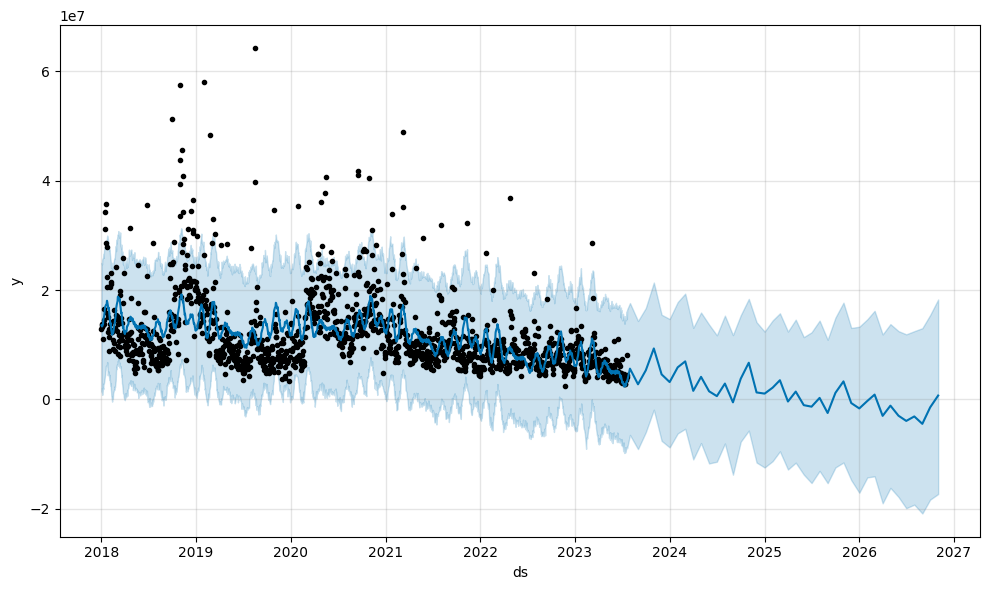

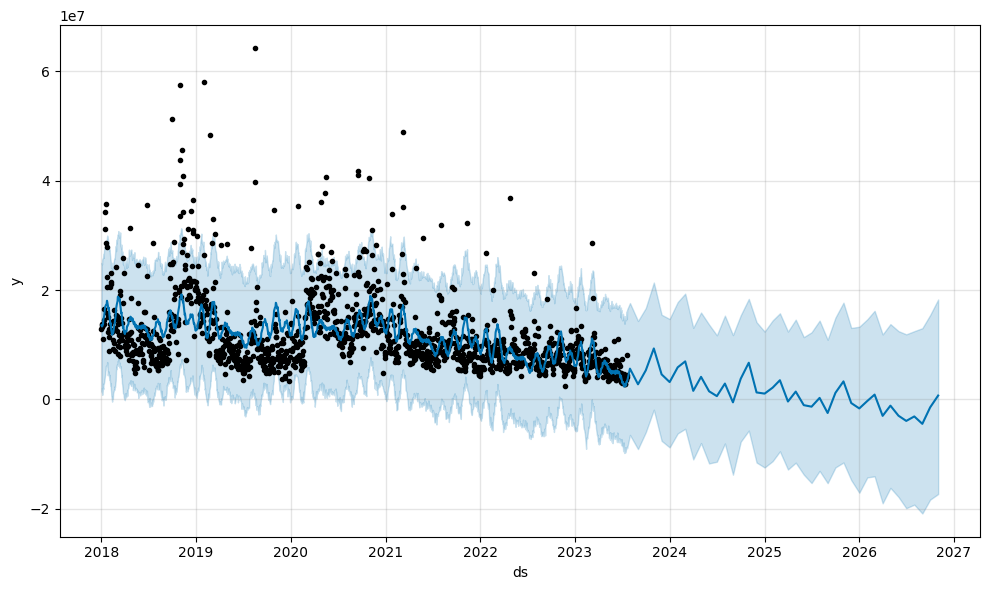

In [ ]:
pro_model.plot(forecast, uncertainty=True)

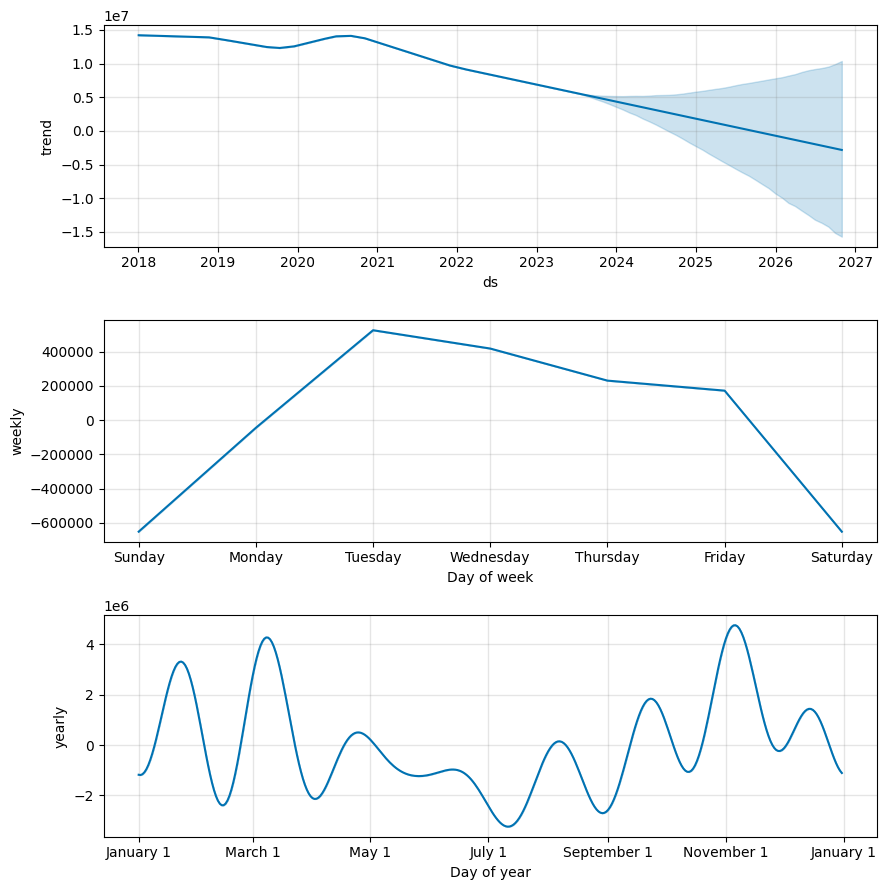

In [ ]:
fig1=pro_model.plot_components(forecast)

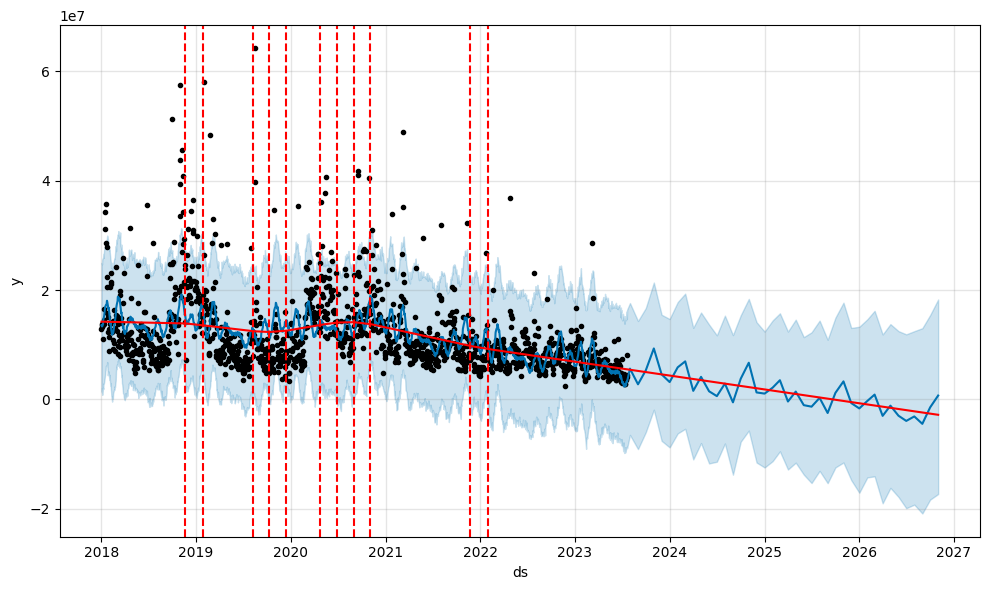

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig =pro_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),pro_model,forecast)

In [ ]:
pro_model.changepoints

45     2018-03-08
89     2018-05-10
134    2018-07-16
179    2018-09-18
223    2018-11-19
268    2019-01-28
312    2019-04-01
357    2019-06-05
402    2019-08-08
446    2019-10-10
491    2019-12-13
536    2020-02-20
580    2020-04-23
625    2020-06-26
670    2020-08-31
714    2020-11-02
759    2021-01-07
804    2021-03-15
848    2021-05-17
893    2021-07-21
937    2021-09-22
982    2021-11-24
1027   2022-01-31
1071   2022-04-04
1116   2022-06-08
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplk20v_fv/d8xsc5c6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplk20v_fv/o4x8xgci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48959', 'data', 'file=/tmp/tmplk20v_fv/d8xsc5c6.json', 'init=/tmp/tmplk20v_fv/o4x8xgci.json', 'output', 'file=/tmp/tmplk20v_fv/prophet_model2nq8rvbu/prophet_model-20230722220310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


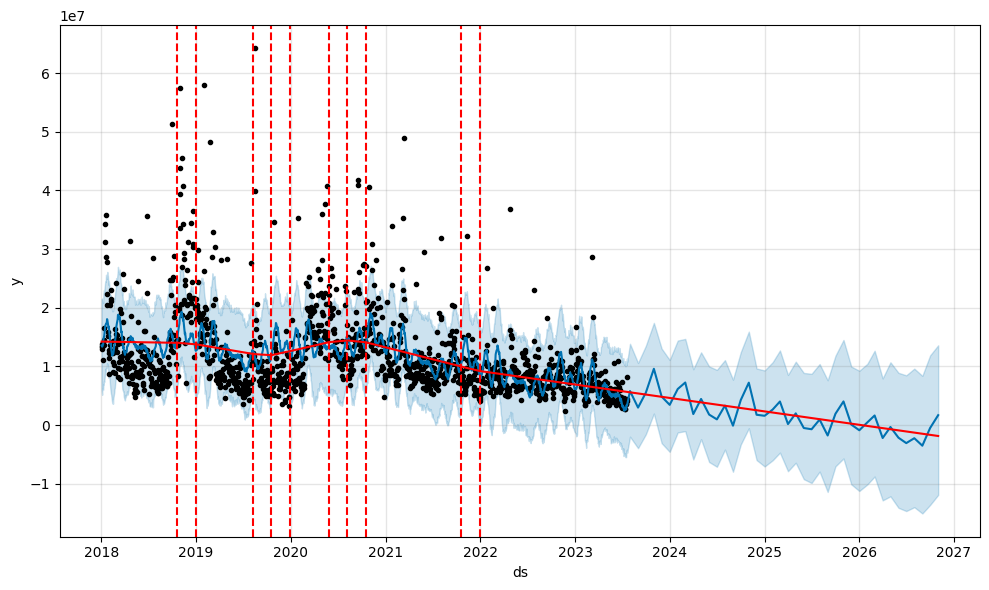

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(dep2).predict(future_date)
fig= pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

# **For Furniture sales dataset**

In [ ]:
data_fur=dfp.filter(["Volume"])

In [ ]:
dataset_fur = data_fur.values

In [ ]:
dataset_fur.shape

(251, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_scaler = MinMaxScaler()
scaled_dataset = data_scaler.fit_transform(dataset_fur)

In [ ]:
training_data_fur_len = int(np.ceil(len(dataset_fur) * 0.70))
dataset_len = len(dataset_fur)

In [ ]:
train_data = scaled_dataset[0 : int(training_data_fur_len), :]

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
val_data = scaled_dataset[training_data_fur_len - 60 : -int(np.ceil(dataset_len * 0.15)), :]

In [ ]:
x_val = []
y_val = scaled_dataset[training_data_fur_len : -int(np.ceil(dataset_len * 0.15)), :]
for i in range(60, len(val_data)):
  x_val.append(val_data[i - 60 : i, 0])


In [ ]:
x_val = np.array(x_val)

In [ ]:
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [ ]:
test_data = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) - 60 :, :]

In [ ]:
x_test = []
y_test = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60 : i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_val shape: ", x_val.shape)
print("x_test shape: ", x_test.shape)
print("\ny_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (116, 60, 1)
x_val shape:  (37, 60, 1)
x_test shape:  (38, 60, 1)

y_train shape:  (116,)
y_val shape:  (37, 1)
y_test shape:  (38, 1)


In [ ]:
from sklearn.metrics import (
mean_squared_error,
mean_absolute_error,
mean_absolute_percentage_error
)

In [ ]:
def get_results(model, X, y):
  results = {}
  predictions = model.predict(X)
  results["mse"] = mean_squared_error(predictions, y)
  results["mae"] = mean_absolute_error(predictions, y)
  results["mape"] = mean_absolute_percentage_error(predictions, y)
  return results

# **Using LSTM model for prediction**

In [ ]:
lstm_model=Sequential()
lstm_model.add(
    LSTM(
        128,
        return_sequences=True,
        input_shape=(
            x_train.shape[1],
            1,
        ),
    )
)
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [ ]:
lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

In [ ]:
lstm_model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=100)

Epoch 1/100
116/116 [==============================] - 12s 50ms/step - loss: 0.0164 - val_loss: 0.0066
Epoch 2/100
116/116 [==============================] - 4s 36ms/step - loss: 0.0156 - val_loss: 0.0064
Epoch 3/100
116/116 [==============================] - 6s 54ms/step - loss: 0.0150 - val_loss: 0.0064
Epoch 4/100
116/116 [==============================] - 7s 61ms/step - loss: 0.0150 - val_loss: 0.0062
Epoch 5/100
116/116 [==============================] - 7s 63ms/step - loss: 0.0150 - val_loss: 0.0064
Epoch 6/100
116/116 [==============================] - 5s 39ms/step - loss: 0.0146 - val_loss: 0.0065
Epoch 7/100
116/116 [==============================] - 4s 35ms/step - loss: 0.0145 - val_loss: 0.0060
Epoch 8/100
116/116 [==============================] - 5s 42ms/step - loss: 0.0146 - val_loss: 0.0062
Epoch 9/100
116/116 [==============================] - 4s 37ms/step - loss: 0.0146 - val_loss: 0.0059
Epoch 10/100
116/116 [==============================] - 4s 35ms/step - loss: 0.01

In [ ]:
lstm_train_results = get_results(lstm_model, x_train, y_train)
lstm_val_results = get_results(lstm_model, x_val, y_val)
lstm_test_results = get_results(lstm_model, x_test, y_test)

2/2 [==============================] - 0s 13ms/step


In [ ]:
print("Train results: ",lstm_train_results)
print("Test results: ",lstm_test_results)
print("Val results: ",lstm_val_results)

Train results:  {'mse': 0.012686563656174668, 'mae': 0.06052334667111643, 'mape': 0.5057329865793222}
Test results:  {'mse': 0.0034410873377082626, 'mae': 0.049733115065456274, 'mape': 0.4534206854164844}
Val results:  {'mse': 0.005138403489569822, 'mae': 0.049663492280267243, 'mape': 0.4260229027603794}


2/2 [==============================] - 0s 22ms/step


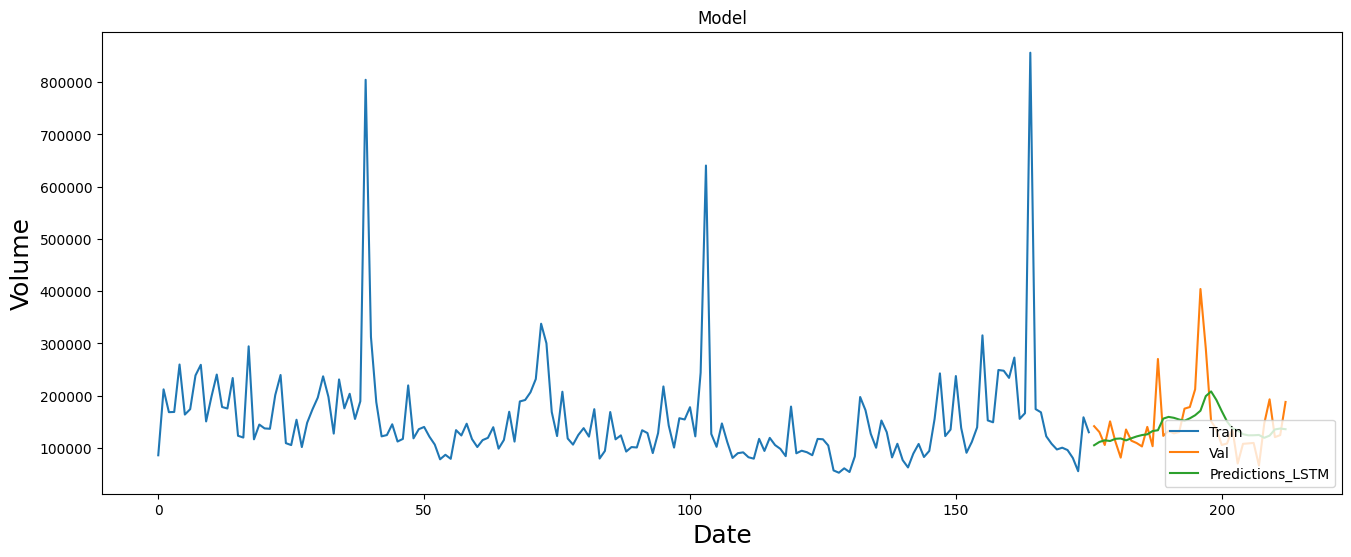

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
train = data_fur[:training_data_fur_len]
valid = data_fur[training_data_fur_len : -int(np.ceil(len(dataset_fur) * 0.15))]
valid["Predictions_LSTM"] = data_scaler.inverse_transform(lstm_model.predict(x_val))
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Volume", fontsize=18)
plt.plot(train["Volume"])
plt.plot(valid[["Volume", "Predictions_LSTM"]])
plt.legend(["Train", "Val", "Predictions_LSTM"], loc="lower right")
plt.show()

# **Using ARIMA model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
train_predictions = []
x_train_arima = np.squeeze(x_train)
train_history = list(x_train_arima[0])
for t in tqdm(range(x_train.shape[0])):
  model = ARIMA(train_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  train_predictions.append(output[0])
  train_history.append(y_train[t])

arima_train_results = {'mse': mean_squared_error(train_predictions, y_train),
                       'mae': mean_absolute_error(train_predictions, y_train),
                       'mape': mean_absolute_percentage_error(train_predictions, y_train)}

100%|██████████| 116/116 [00:17<00:00,  6.56it/s]


In [ ]:
val_predictions = []
x_val_arima = np.squeeze(x_val)
val_history = train_history.copy()

In [ ]:
for t in tqdm(range(len(x_val))):
  model = ARIMA(val_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  val_predictions.append(output[0])
  val_history.append(y_val[t][0])

100%|██████████| 37/37 [00:06<00:00,  5.59it/s]


In [ ]:
arima_val_results = {'mse': mean_squared_error(val_predictions, y_val),
                     'mae': mean_absolute_error(val_predictions, y_val),
                     'mape': mean_absolute_percentage_error(val_predictions, y_val)}

In [ ]:
test_predictions = []
x_test_arima = np.squeeze(x_test)
test_history = val_history.copy()

In [ ]:
for t in tqdm(range(len(x_test))):
  model = ARIMA(test_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  test_predictions.append(output[0])
  test_history.append(y_test[t][0])

100%|██████████| 38/38 [00:08<00:00,  4.47it/s]


In [ ]:
arima_test_results = {'mse': mean_squared_error(test_predictions, y_test),
                      'mae': mean_absolute_error(test_predictions, y_test),
                      'mape': mean_absolute_percentage_error(test_predictions, y_test)}

In [ ]:
print("Train results: ", arima_train_results)
print("Val results: ", arima_val_results)
print("Test results: ", arima_test_results)

Train results:  {'mse': 0.016499291799618468, 'mae': 0.07211359446168257, 'mape': 0.581402985433635}
Val results:  {'mse': 0.006345436437513876, 'mae': 0.05477157781183885, 'mape': 0.4848812434814837}
Test results:  {'mse': 0.0030478210832928813, 'mae': 0.045412363304304405, 'mape': 0.5024957436001943}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data_fur[:training_data_fur_len]
valid = data_fur[training_data_fur_len : -int(np.ceil(len(dataset_fur) * 0.15))]

In [ ]:
val_predictions=np.array(val_predictions)
val_predictions2=val_predictions.T
scaler=MinMaxScaler()
scaler.fit(val_predictions2)
valid["Predictions_ARIMA"] = scaler.inverse_transform(val_predictions2)

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Volume", fontsize=18)
plt.plot(train["Volume"])
plt.plot(valid[["Volume", "Predictions_ARIMA"]])
plt.legend(["Train", "Val", "Predictions_ARIMA"], loc="lower right")
plt.show()

# **Using Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_clf=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

In [ ]:
x_train=x_train.reshape(116,60)
x_val=x_val.reshape(37,60)
x_test=x_test.reshape(38,60)

In [ ]:
lr_clf.fit(x_train,y_train)

LinearRegression()

In [ ]:
train_predictions=lr_clf.predict(x_train)
val_predictions=lr_clf.predict(x_val)
test_predictions=lr_clf.predict(x_test)

In [ ]:
train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

In [ ]:
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Testing MSE:", test_mse)

Training MSE: 0.009232985170785206
Validation MSE: 0.02097531858058539
Testing MSE: 0.009168194953563356


In [ ]:
train_mape = mean_absolute_percentage_error(y_train, train_predictions)
val_mape = mean_absolute_percentage_error(y_val, val_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

In [ ]:
print("Training MAPE:", train_mape)
print("Validation MAPE:", val_mape)
print("Testing MAPE:", test_mape)

Training MAPE: 1.0608479623969842
Validation MAPE: 1.3124819690574703
Testing MAPE: 8198096539001.617


In [ ]:
train_mae = mean_absolute_error(y_train, train_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

In [ ]:
print("Training MSE:", train_mae)
print("Validation MSE:", val_mae)
print("Testing MSE:", test_mae)

Training MSE: 0.057747124192800155
Validation MSE: 0.11620466058198696
Testing MSE: 0.07828903343758356


# **Using Decission tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr= DecisionTreeRegressor(random_state=42,max_depth=None,criterion="absolute_error",splitter='random',min_samples_leaf=1)

In [ ]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=42,
                      splitter='random')

In [ ]:
train_predictions_dtr=dtr.predict(x_train)
val_predictions_dtr=dtr.predict(x_val)
test_predictions_dtr=dtr.predict(x_test)

In [ ]:
train_mse_dtr = mean_squared_error(y_train, train_predictions_dtr)
val_mse_dtr = mean_squared_error(y_val, val_predictions_dtr)
test_mse_dtr = mean_squared_error(y_test, test_predictions_dtr)

In [ ]:
print("Training MSE:", train_mse_dtr)
print("Validation MSE:", val_mse_dtr)
print("Testing MSE:", test_mse_dtr)

Training MSE: 0.0
Validation MSE: 0.032047933011025466
Testing MSE: 0.007460297745051478


In [ ]:
train_mape_dtr = mean_absolute_percentage_error(y_train, train_predictions_dtr)
val_mape_dtr = mean_absolute_percentage_error(y_val, val_predictions_dtr)
test_mape_dtr = mean_absolute_percentage_error(y_test, test_predictions_dtr)

In [ ]:
print("Training MAPE:", train_mape_dtr)
print("Validation MAPE:", val_mape_dtr)
print("Testing MAPE:", test_mape_dtr)

Training MAPE: 0.0
Validation MAPE: 1.0059111164248307
Testing MAPE: 7587005706807.827


In [ ]:
train_mae_dtr = mean_absolute_error(y_train, train_predictions_dtr)
val_mae_dtr = mean_absolute_error(y_val, val_predictions_dtr)
test_mae_dtr = mean_absolute_error(y_test, test_predictions_dtr)

In [ ]:
print("Training MAE:", train_mae_dtr)
print("Validation MAE:", val_mae_dtr)
print("Testing MAE:", test_mae_dtr)

Training MAE: 0.0
Validation MAE: 0.10050801172643668
Testing MAE: 0.06649005500377987


# **Using Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(loss='absolute_error',n_estimators=1000,learning_rate=0.001,max_depth=100,criterion='friedman_mse')

In [ ]:
x_train=x_train.reshape(116,60)
x_val=x_val.reshape(37,60)
x_test=x_test.reshape(38,60)

In [ ]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.001, loss='absolute_error',
                          max_depth=100, n_estimators=1000)

In [ ]:
train_predictions_gbr=gbr.predict(x_train)
val_predictions_gbr=gbr.predict(x_val)
test_predictions_gbr=gbr.predict(x_test)

In [ ]:
train_mse_gbr = mean_squared_error(y_train, train_predictions_gbr)
val_mse_gbr = mean_squared_error(y_val, val_predictions_gbr)
test_mse_gbr = mean_squared_error(y_test, test_predictions_gbr)

In [ ]:
print("Training MSE:", train_mse_gbr)
print("Validation MSE:", val_mse_gbr)
print("Testing MSE:", test_mse_gbr)

Training MSE: 0.011436929697118809
Validation MSE: 0.0059324764221360925
Testing MSE: 0.0029497650172549674


In [ ]:
train_mape_gbr = mean_absolute_percentage_error(y_train, train_predictions_gbr)
val_mape_gbr = mean_absolute_percentage_error(y_val, val_predictions_gbr)
test_mape_gbr = mean_absolute_percentage_error(y_test, test_predictions_gbr)

In [ ]:
print("Training MAPE:", train_mape_gbr)
print("Validation MAPE:", val_mape_gbr)
print("Testing MAPE:", test_mape_gbr)

Training MAPE: 0.5218826054383071
Validation MAPE: 0.42955631264073174
Testing MAPE: 8849698295525.283


In [ ]:
train_mae_gbr = mean_absolute_error(y_train, train_predictions_gbr)
val_mae_gbr = mean_absolute_error(y_val, val_predictions_gbr)
test_mae_gbr = mean_absolute_error(y_test, test_predictions_gbr)

In [ ]:
print("Training MAE:", train_mae_gbr)
print("Validation MAE:", val_mae_gbr)
print("Testing MAE:", test_mae_gbr)

Training MAE: 0.03799703813582472
Validation MAE: 0.04630547353969805
Testing MAE: 0.04370842757720045


# **Using Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200,max_depth=None,min_samples_split=2,max_features='sqrt',max_samples=None)

In [ ]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [ ]:
train_predictions_rfr=rfr.predict(x_train)
val_predictions_rfr=rfr.predict(x_val)
test_predictions_rfr=rfr.predict(x_test)

In [ ]:
train_mse_rfr = mean_squared_error(y_train, train_predictions_rfr)
val_mse_rfr = mean_squared_error(y_val, val_predictions_rfr)
test_mse_rfr = mean_squared_error(y_test, test_predictions_rfr)

In [ ]:
print("Training MSE:", train_mse_rfr)
print("Validation MSE:", val_mse_rfr)
print("Testing MSE:", test_mse_rfr)

Training MSE: 0.0019899856553403194
Validation MSE: 0.007036973010923324
Testing MSE: 0.003956070842680636


In [ ]:
train_mape_rfr = mean_absolute_percentage_error(y_train, train_predictions_rfr)
val_mape_rfr = mean_absolute_percentage_error(y_val, val_predictions_rfr)
test_mape_rfr = mean_absolute_percentage_error(y_test, test_predictions_rfr)

In [ ]:
print("Training MAPE:", train_mape_rfr)
print("Validation MAPE:", val_mape_rfr)
print("Testing MAPE:", test_mape_rfr)

Training MAPE: 0.43829145380614537
Validation MAPE: 0.7470448756891621
Testing MAPE: 10267405305160.496


In [ ]:
train_mae_rfr = mean_absolute_error(y_train, train_predictions_rfr)
val_mae_rfr = mean_absolute_error(y_val, val_predictions_rfr)
test_mae_rfr = mean_absolute_error(y_test, test_predictions_rfr)

In [ ]:
print("Training MAE:", train_mae_rfr)
print("Validation MAE:", val_mae_rfr)
print("Testing MAE:", test_mae_rfr)

Training MAE: 0.02388312646240035
Validation MAE: 0.06457180434520704
Testing MAE: 0.05400124801230418


# **Using Prophet model**

In [ ]:
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [ ]:
dfp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-22,25.830000,26.120001,25.350000,25.700001,23.958895,85900
1,2022-07-25,26.000000,26.490000,25.799999,26.010000,24.247894,212000
2,2022-07-26,26.049999,26.170000,25.320000,25.480000,23.753799,168400
3,2022-07-27,25.450001,26.320000,25.450001,26.299999,24.518248,168800
4,2022-07-28,26.430000,26.870001,26.040001,26.790001,24.975052,259600
...,...,...,...,...,...,...,...
246,2023-07-17,33.000000,33.689999,33.000000,33.119999,33.119999,100100
247,2023-07-18,33.240002,34.119999,33.240002,33.750000,33.750000,65000
248,2023-07-19,33.779999,34.459999,33.630001,34.279999,34.279999,84400
249,2023-07-20,34.400002,34.400002,33.799999,34.279999,34.279999,60400


In [ ]:
dfp2=dfp[['Date','Volume']]

In [ ]:
dfp2.columns=['ds','y']

In [ ]:
dfp2

,ds,y
0,2022-07-22,85900
1,2022-07-25,212000
2,2022-07-26,168400
3,2022-07-27,168800
4,2022-07-28,259600
...,...,...
246,2023-07-17,100100
247,2023-07-18,65000
248,2023-07-19,84400
249,2023-07-20,60400


In [ ]:
pro_model = Prophet(interval_width=0.95)

In [ ]:
pro_model.fit(dfp2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0aqqa6x/w6dez0u7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0aqqa6x/60kusg1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71533', 'data', 'file=/tmp/tmpx0aqqa6x/w6dez0u7.json', 'init=/tmp/tmpx0aqqa6x/60kusg1z.json', 'output', 'file=/tmp/tmpx0aqqa6x/prophet_model3wq4y8pv/prophet_model-20230723044743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:47:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:47:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_date = pro_model.make_future_dataframe(periods=40, freq='MS')
future_date.tail()

,ds
286,2026-07-01
287,2026-08-01
288,2026-09-01
289,2026-10-01
290,2026-11-01


In [ ]:
forecast = pro_model.predict(future_date)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-07-22,193016.451041,23346.352779,375040.334512
1,2022-07-25,165958.015246,-7004.700213,335002.400926
2,2022-07-26,168767.161487,-12112.439282,333342.125359
3,2022-07-27,165112.972530,-9438.367049,345310.921653
4,2022-07-28,158927.656493,-17124.224168,320369.508565


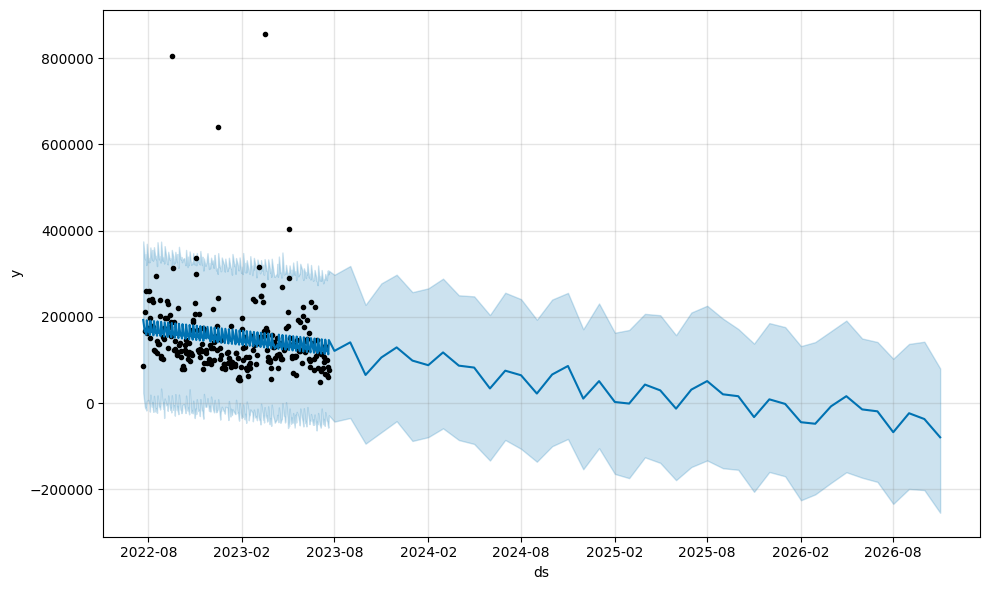

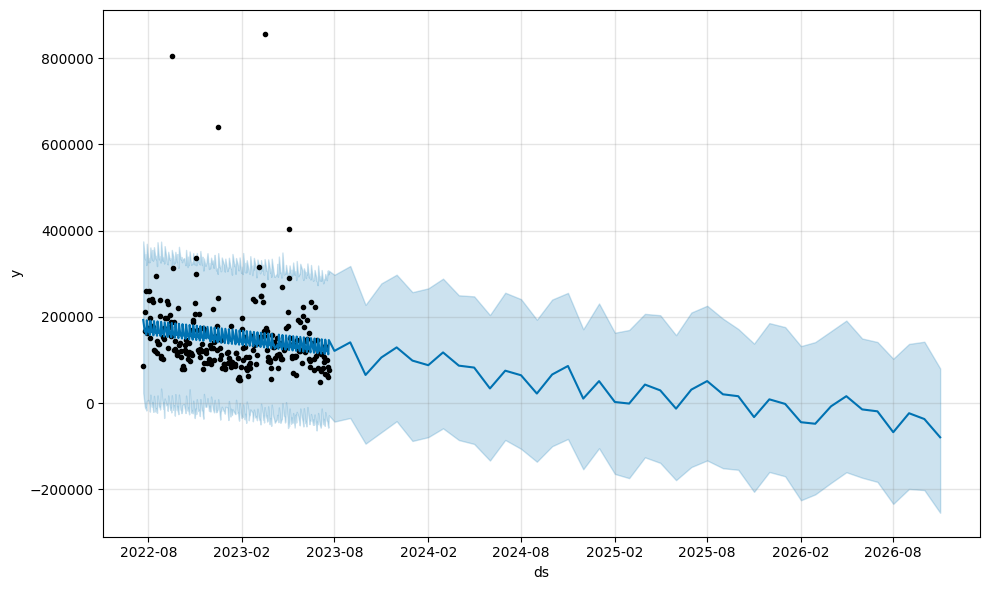

In [ ]:
pro_model.plot(forecast, uncertainty=True)

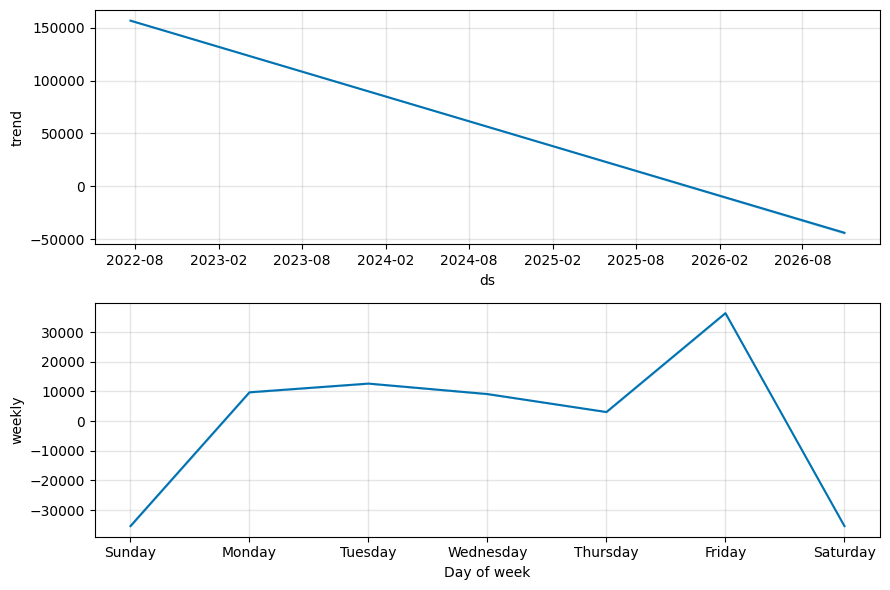

In [ ]:
fig1=pro_model.plot_components(forecast)

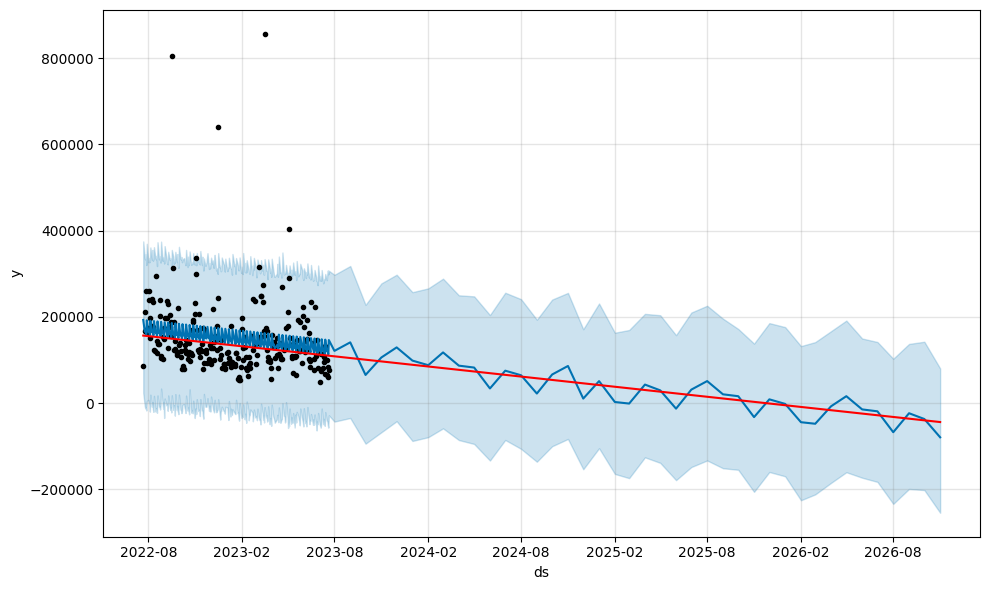

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig =pro_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),pro_model,forecast)

In [ ]:
pro_model.changepoints

8     2022-08-03
16    2022-08-15
24    2022-08-25
32    2022-09-07
40    2022-09-19
48    2022-09-29
56    2022-10-11
64    2022-10-21
72    2022-11-02
80    2022-11-14
88    2022-11-25
96    2022-12-07
103   2022-12-16
111   2022-12-29
119   2023-01-11
127   2023-01-24
135   2023-02-03
143   2023-02-15
151   2023-02-28
159   2023-03-10
167   2023-03-22
175   2023-04-03
183   2023-04-14
191   2023-04-26
199   2023-05-08
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0aqqa6x/x7yo3me3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0aqqa6x/59jbacc7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19928', 'data', 'file=/tmp/tmpx0aqqa6x/x7yo3me3.json', 'init=/tmp/tmpx0aqqa6x/59jbacc7.json', 'output', 'file=/tmp/tmpx0aqqa6x/prophet_model2kafaehh/prophet_model-20230723045325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


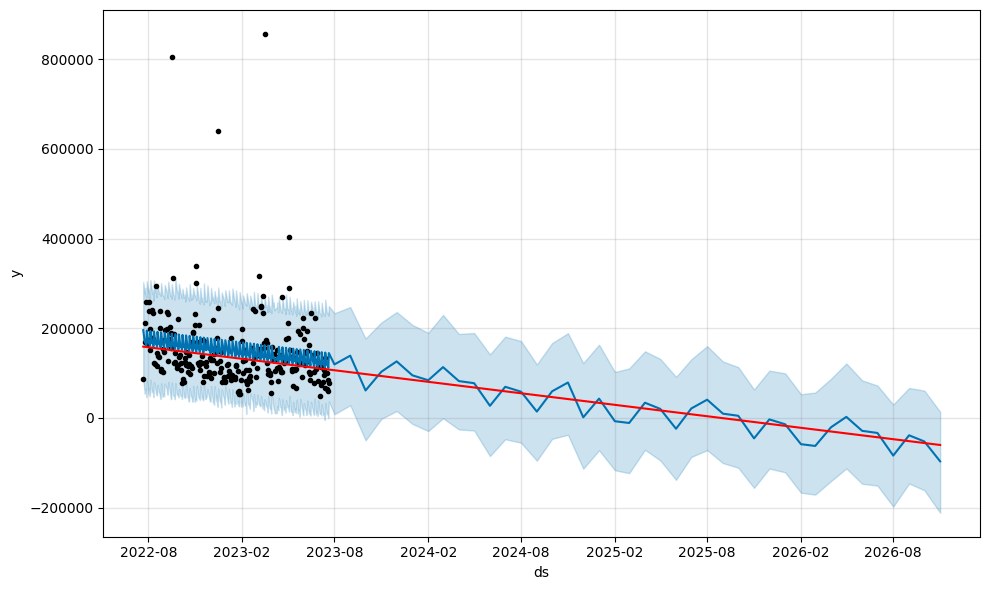

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(dfp2).predict(future_date)
fig= pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)